# ELIF Model
We use the following update rule in order to simulate a
single neuron with $ELIF$ model.

$u(t+\delta_t) = u(t) + \delta_t/\tau[-(u(t) - u_r) + \Delta_Texp (\frac{u(t)-\theta_{rh}}{\Delta_T}) + R.I(t)]$

In all the following simulations, we fix the $threshold=-50mv$,
$u_{rest}=-65mv$ and $\tau=50$ for convenience. As we explored the effects of
these parameters in the previous project, we fix them here since the ELIF is
a more general LIF neuron; therefore, all we said about LIF previously holds true
for ELIF.


In [1]:
import sys
sys.path.append('..')
import numpy as np
import torch
from cnsproject.plotting.plotting import time_plot, fi_curve, adaptation_plot
from cnsproject.utils import run_simulation_with_params
from cnsproject.network.neural_populations import ELIFPopulation, \
    AELIFPopulation
torch.set_default_tensor_type(torch.FloatTensor)
%matplotlib inline

In [2]:
# Initializing the simulation variables
iters = 1000
zero_percent = 2
save_monitor_states = True
neuron_type = ELIFPopulation
monitor_vars = ["potential", "s", "u_rest", "threshold", "in_current", "tau",
                "theta_rh", "theta_reset"]
if neuron_type == AELIFPopulation:
    monitor_vars.append("w")

## Simulation with neuron_params_1
$\Delta_T = 5$,
$\theta_{reset} = -20 mv$,
$\theta_{rh} = -55 mv$,


### Without noise:

In [3]:
num_steps = 16
step_currents = np.linspace(5, 50, num_steps, dtype=np.float32)
neuron_params_1 = {'threshold': -50, 'u_rest': -65, 'tau': 50,
                   'delta_T': 5, 'theta_rh': -55, 'theta_reset': -20}

In [4]:
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_1,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=10,
        neuron_type=neuron_type,
        noise_std=0,
        line_slop=0
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 6.337s
Currents: [ 5. 11. 17. 23. 29. 35. 41. 47.]
frequencies: [ 0  7 12 16 20 24 27 31]


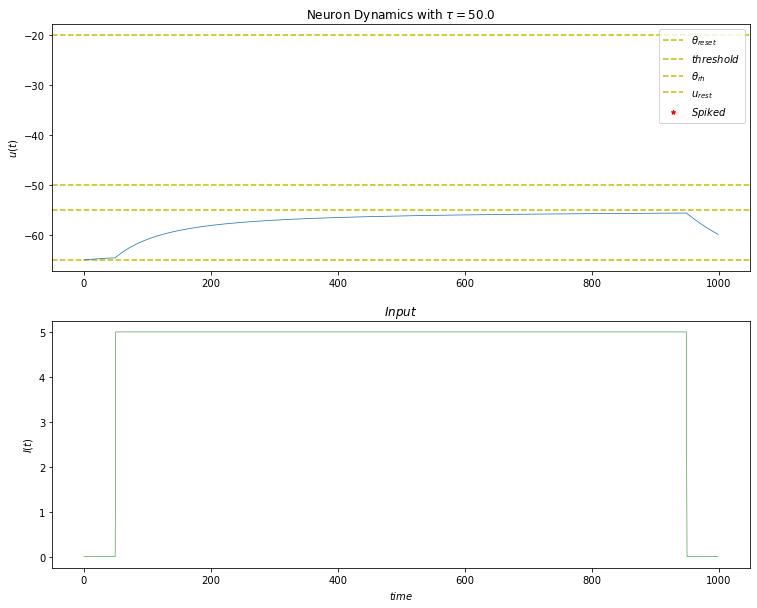

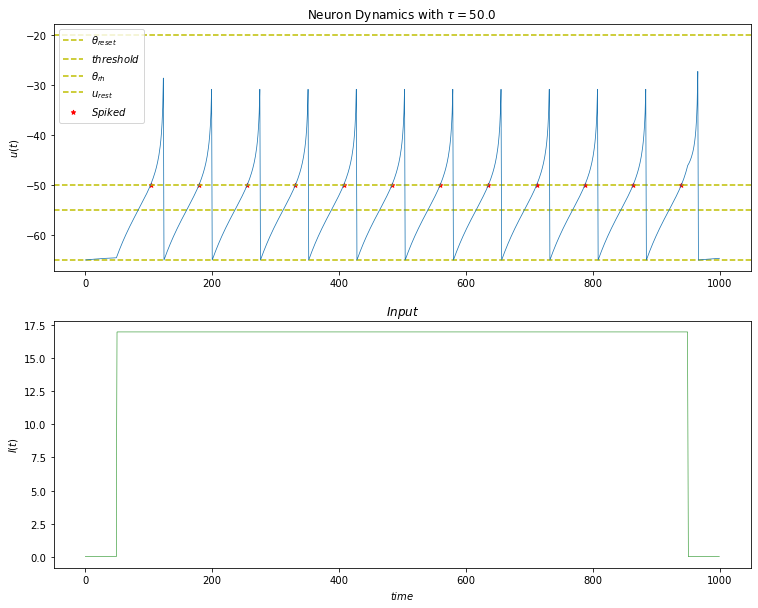

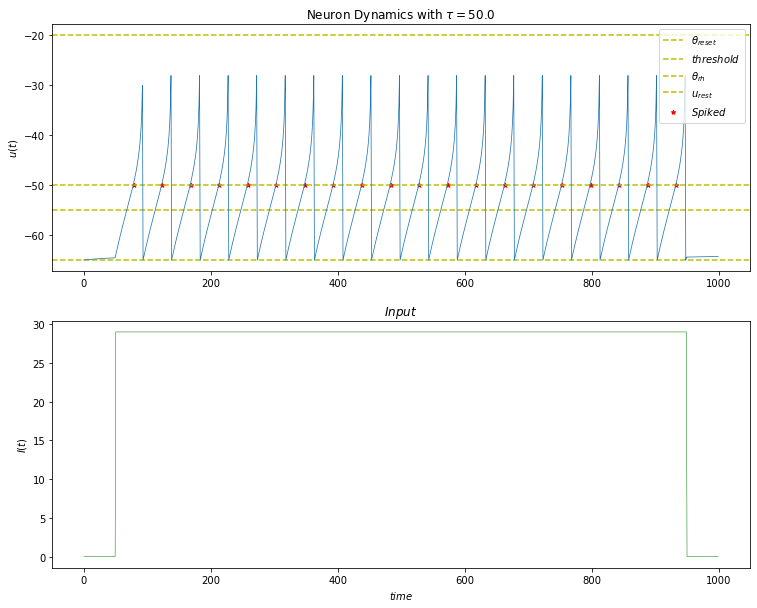

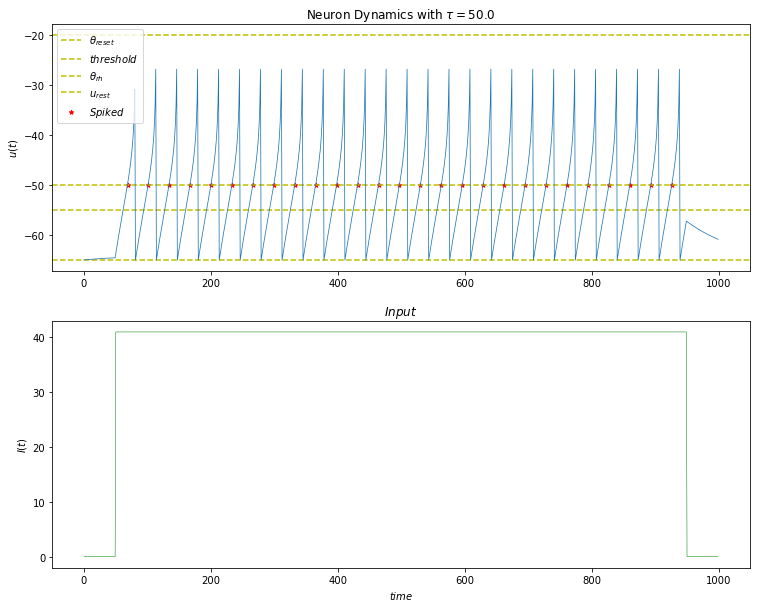

In [5]:
if save_monitor_states:
    for i in range(0, len(step_currents), num_steps // 4):
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
else:
    time_plot(monitor, plot_spikes=False, figsize=(12.5, 10))

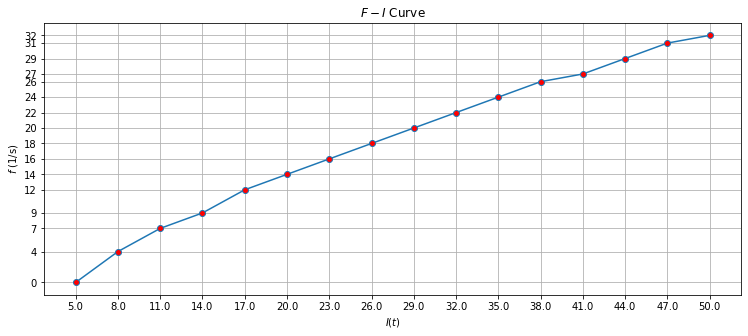

In [6]:
fi_curve(currents, frequencies)

### With noise: $\sigma_{noise} = 3$

In [7]:
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_1,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=10,
        neuron_type=neuron_type,
        noise_std=3,
        line_slop=0
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 6.556s
Currents: [ 5. 11. 17. 23. 29. 35. 41. 47.]
frequencies: [ 0  7 11 16 20 24 27 31]


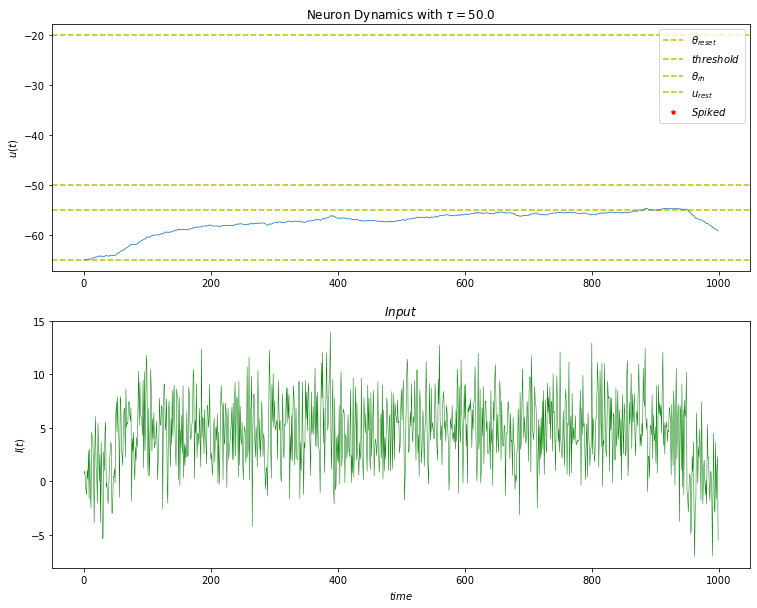

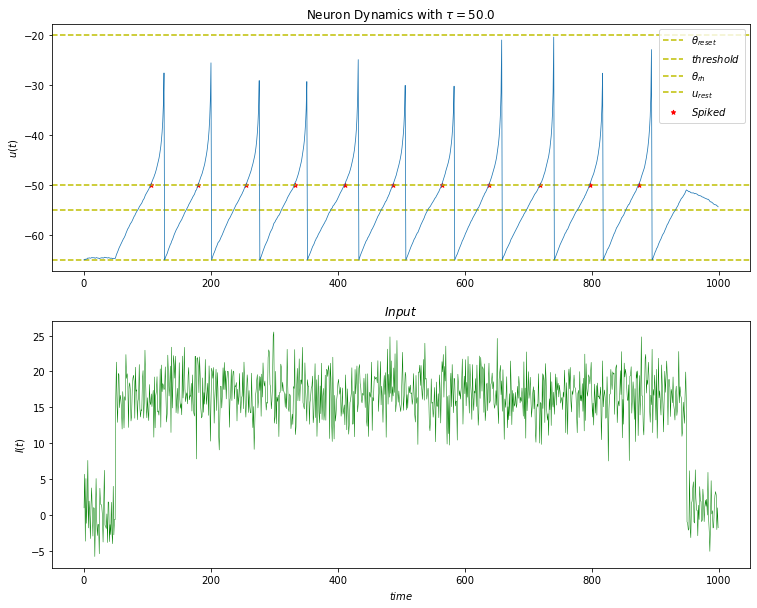

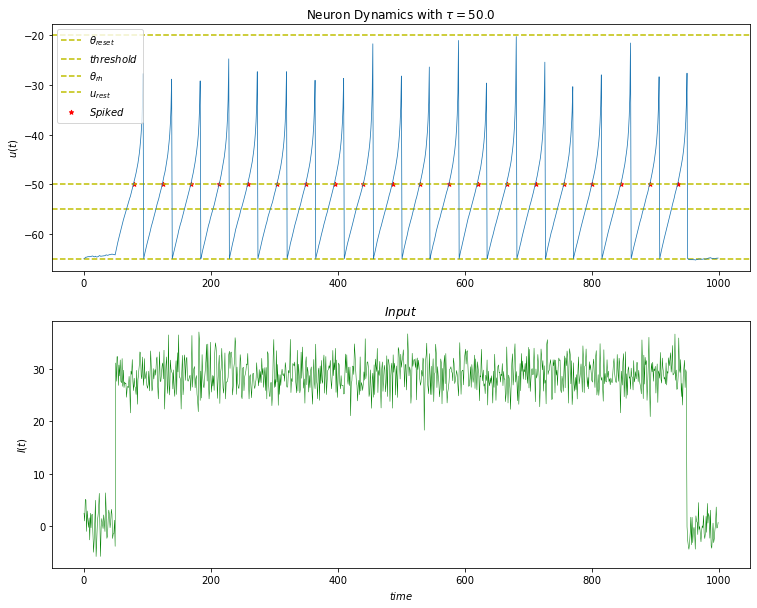

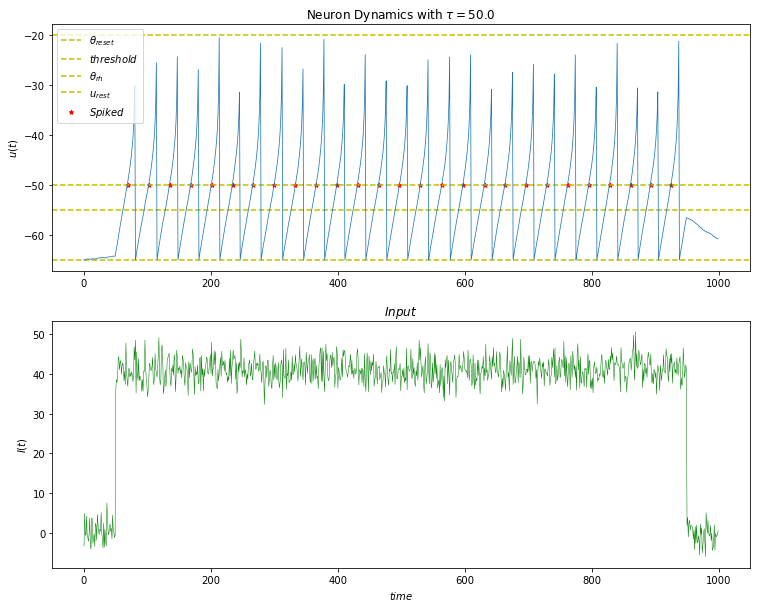

In [8]:
if save_monitor_states:
    for i in range(0, len(step_currents), num_steps // 4):
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
else:
    time_plot(monitor, plot_spikes=False, figsize=(12.5, 10))

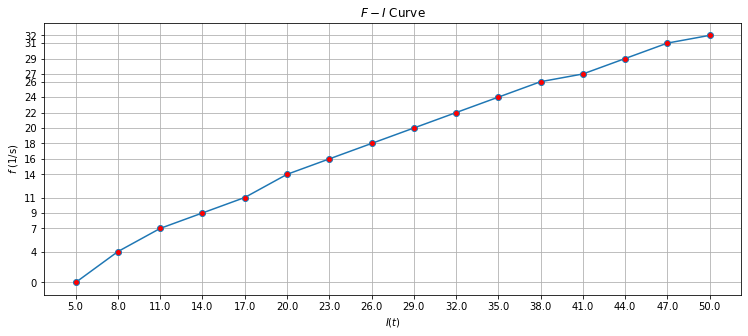

In [9]:
fi_curve(currents, frequencies)

### With noise: $\sigma_{noise} = 5$

In [10]:
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_1,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=10,
        neuron_type=neuron_type,
        noise_std=9,
        line_slop=0
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 6.671s
Currents: [ 5. 11. 17. 23. 29. 35. 41. 47.]
frequencies: [ 0  7 11 16 20 24 27 31]


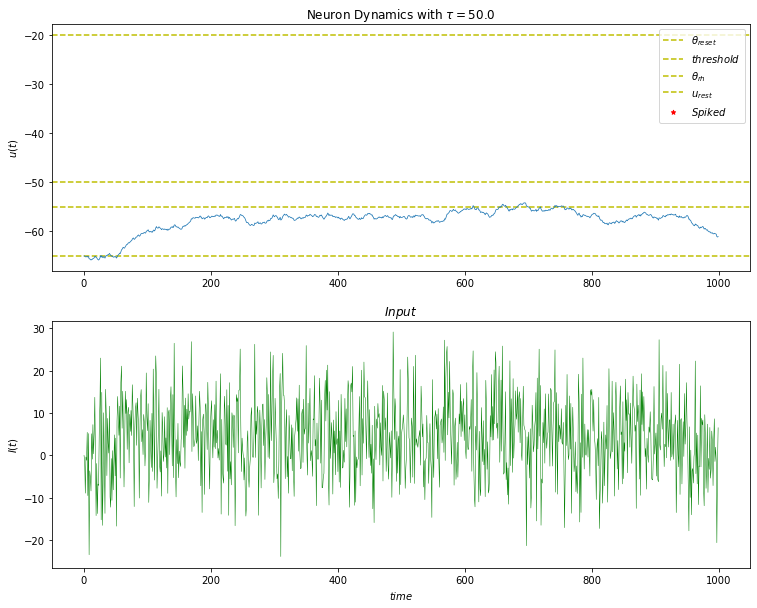

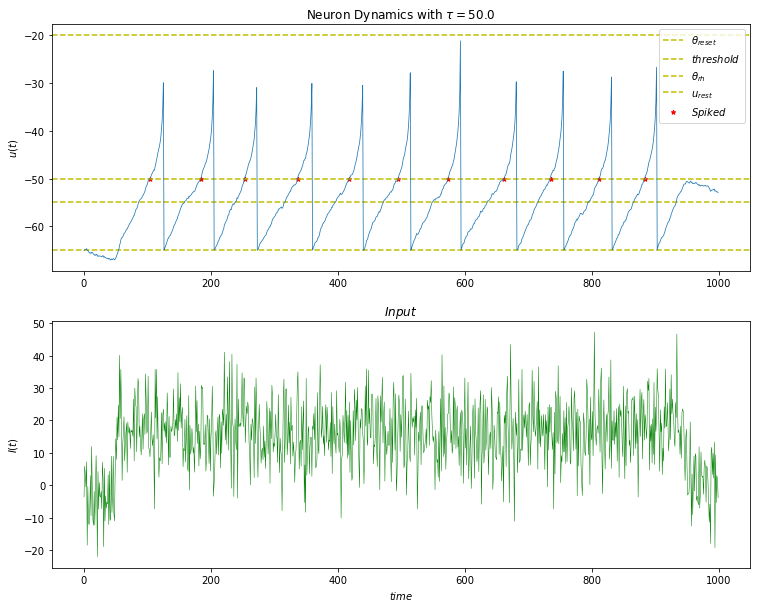

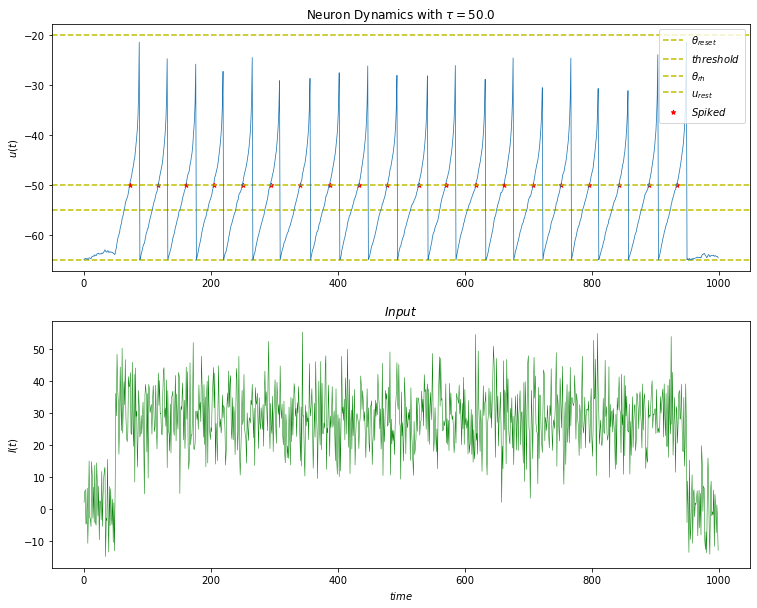

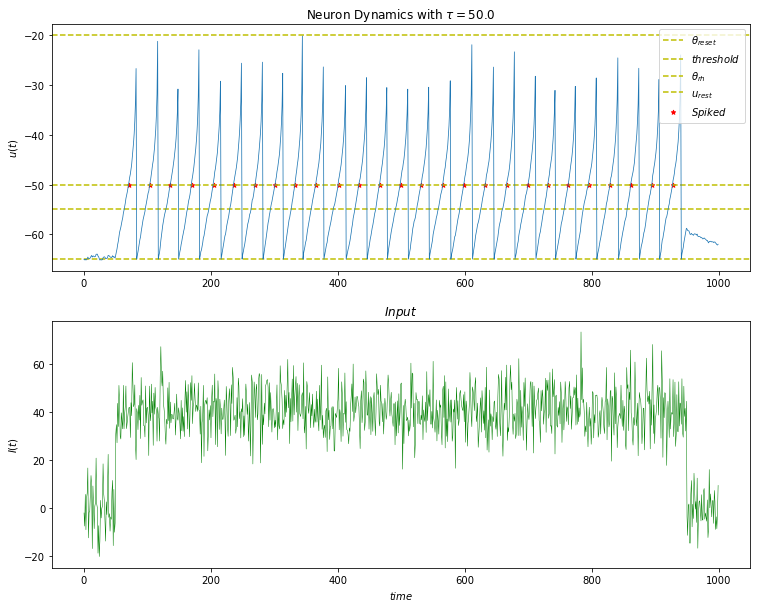

In [11]:
if save_monitor_states:
    for i in range(0, len(step_currents), num_steps // 4):
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
else:
    time_plot(monitor, plot_spikes=False, figsize=(12.5, 10))

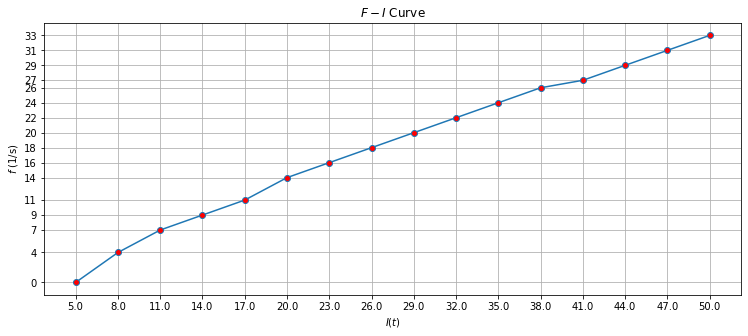

In [12]:
fi_curve(currents, frequencies)

We see that high values of noise may change the neuron's firing rate a bit.


## Simulation with neuron_params_2
$\Delta_T = 5$,
$\theta_{reset} = +30 mv$,
$\theta_{rh} = -55 mv$,


### Without noise:

In [13]:
num_steps = 16
step_currents = np.linspace(5, 50, num_steps, dtype=np.float32)
neuron_params_2 = {'threshold': -50, 'u_rest': -65, 'tau': 50,
                   'delta_T': 5, 'theta_rh': -55, 'theta_reset': +30}

In [14]:
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_2,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=10,
        neuron_type=neuron_type,
        noise_std=0,
        line_slop=0
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 7.313s
Currents: [ 5. 11. 17. 23. 29. 35. 41. 47.]
frequencies: [ 0  7 11 16 19 23 26 30]


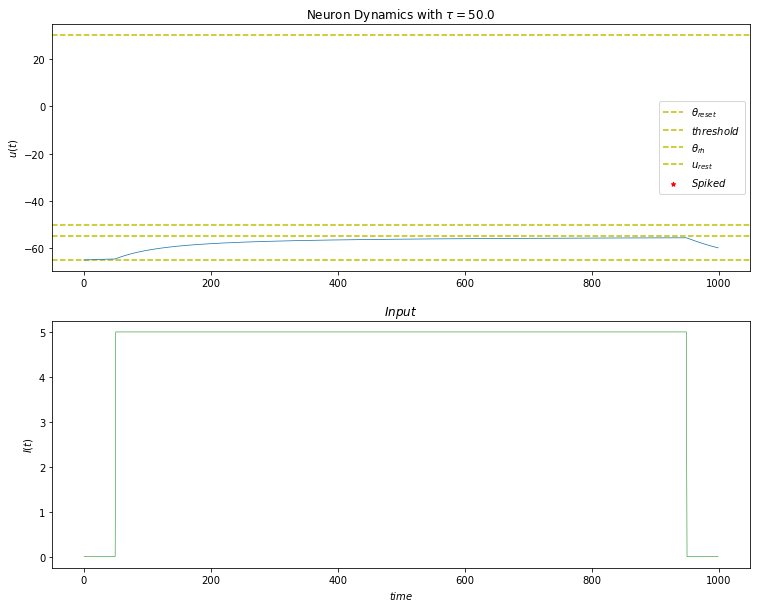

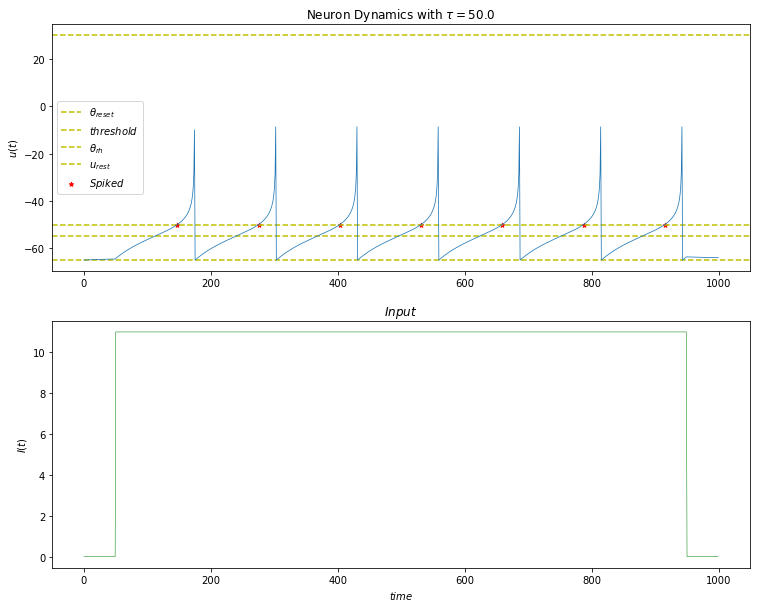

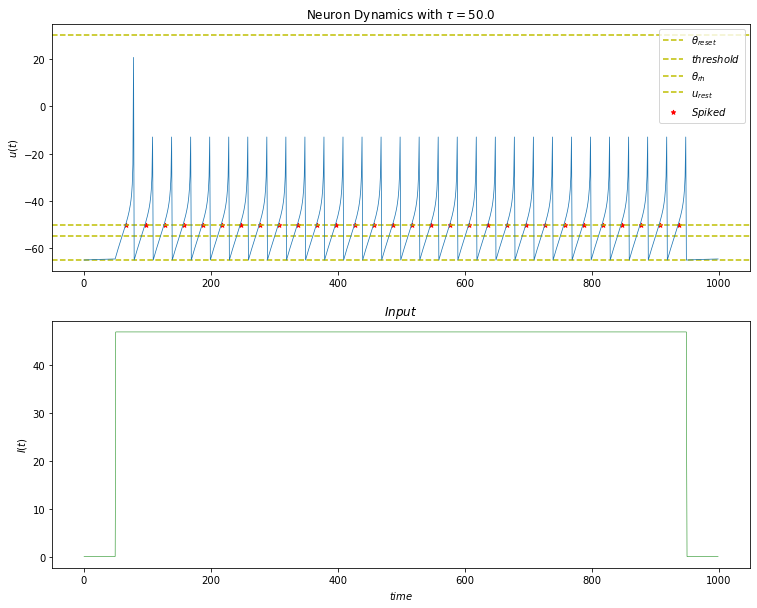

In [15]:
if save_monitor_states:
    # for i in range(0, len(step_currents), num_steps // 4):
    for i in [0, 2, -2]:
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
else:
    time_plot(monitor, plot_spikes=False, figsize=(12.5, 10))

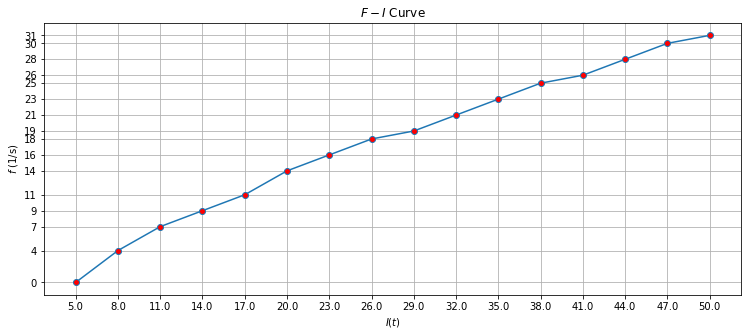

In [16]:
fi_curve(currents, frequencies)

In the above simulations, we only changed the value of $\theta_{reset}$ from
$-20mv$ to $+30mv$. By comparing the output curves, we can conclude that
this parameter does not have a significant impact on the neuron's activity.
The reason is this: After the voltage reaches the $\theta_{rh}$, it grows
exponentially, and changing $\theta_{reset}$ will not affect the time to reset
of the neuron very much. Because of this, we do not simulate this parameter set
with noisy input.

We fix $\theta_{reset} = -20mv$ for the following simulations.

Now we change $\Delta_T$ and $\tau$.

## Simulation with neuron_params_3
$\Delta_T = 10$,
$\theta_{reset} = -20 mv$,
$\theta_{rh} = -55 mv$,


### Without noise:

In [17]:
neuron_params_3 = {'threshold': -50, 'u_rest': -65, 'tau': 50,
                   'delta_T': 10, 'theta_rh': -55, 'theta_reset': -20}

In [18]:
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_3,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=10,
        neuron_type=neuron_type,
        noise_std=0,
        line_slop=0
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 6.447s
Currents: [ 5. 11. 17. 23. 29. 35. 41. 47.]
frequencies: [ 5  9 12 15 18 21 24 27]


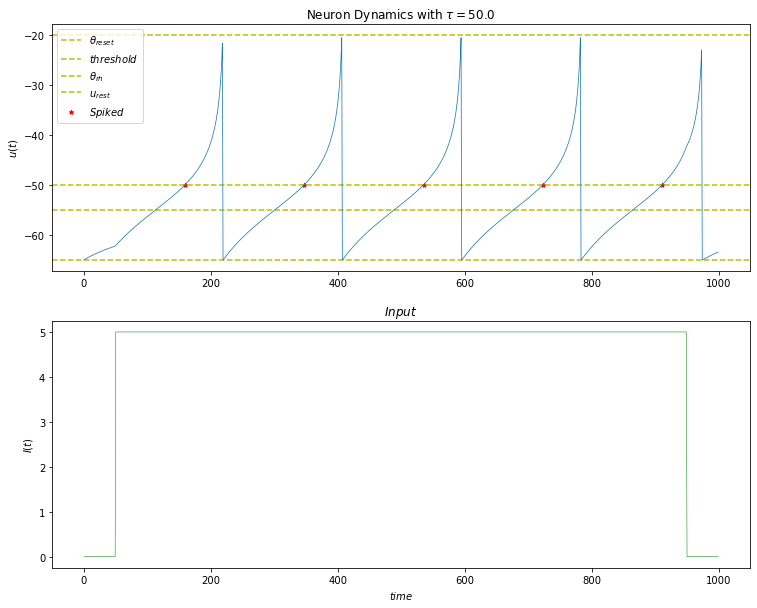

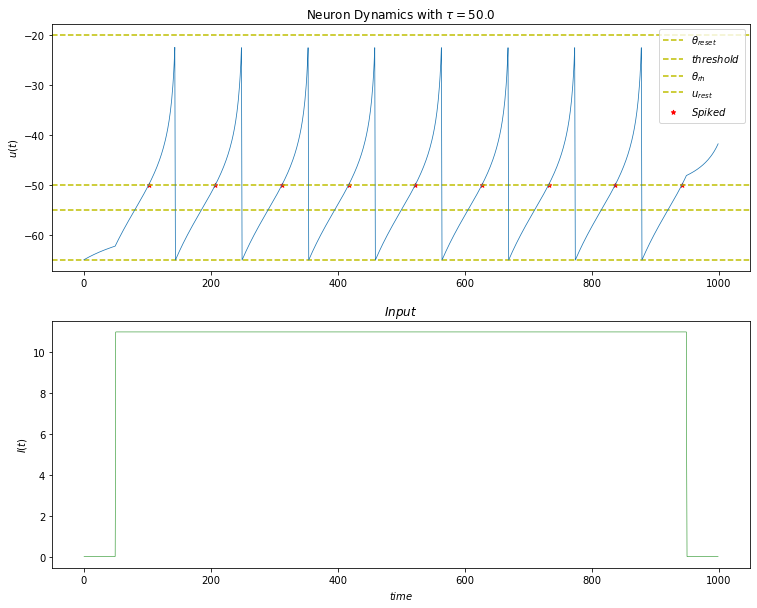

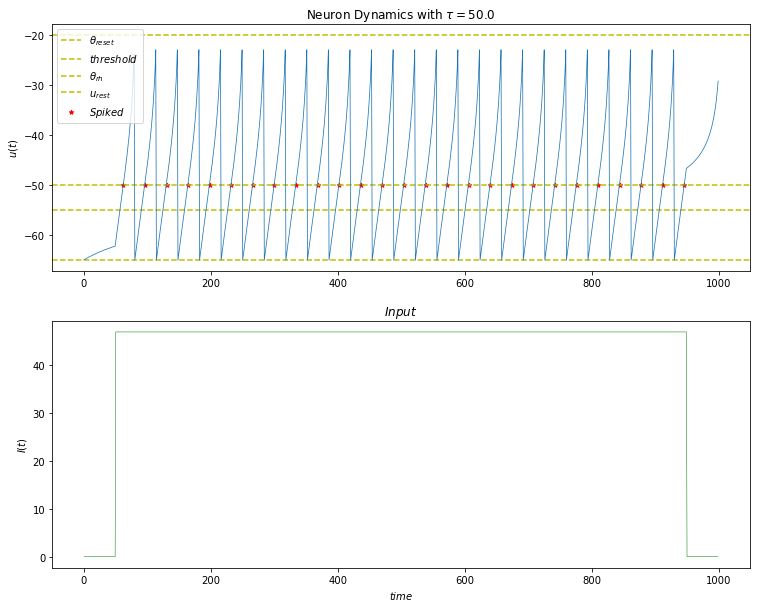

In [19]:
if save_monitor_states:
    # for i in range(0, len(step_currents), num_steps // 4):
    for i in [0, 2, -2]:
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
else:
    time_plot(monitor, plot_spikes=False, figsize=(12.5, 10))

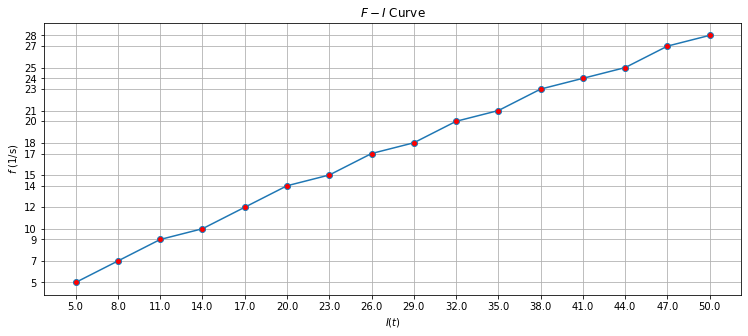

In [20]:
fi_curve(currents, frequencies)

## Simulation with neuron_params_4
$\Delta_T = 20$,
$\theta_{reset} = +30 mv$,
$\theta_{rh} = -55 mv$


### Without noise:

In [21]:
neuron_params_4 = {'threshold': -50, 'u_rest': -65, 'tau': 50,
                   'delta_T': 10, 'theta_rh': -55}

In [22]:
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_4,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=10,
        neuron_type=neuron_type,
        noise_std=0,
        line_slop=0
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 6.421s
Currents: [ 5. 11. 17. 23. 29. 35. 41. 47.]
frequencies: [ 5  9 12 15 18 21 24 27]


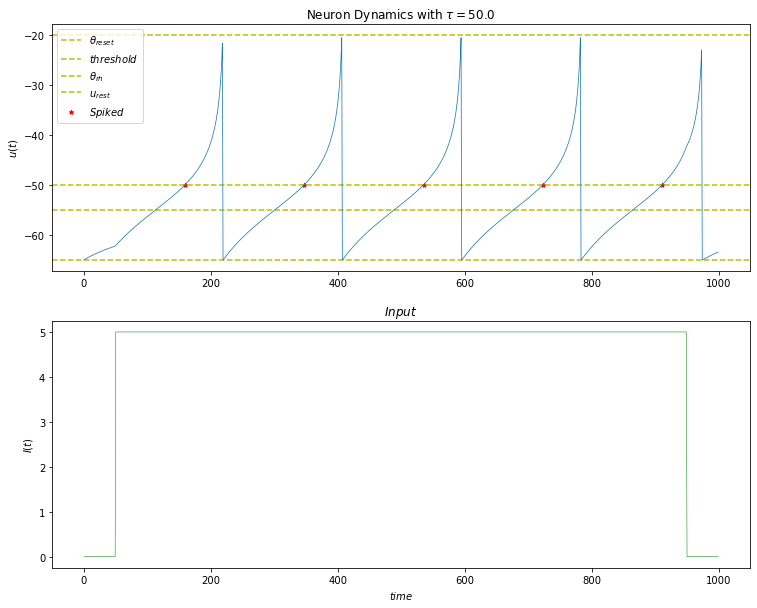

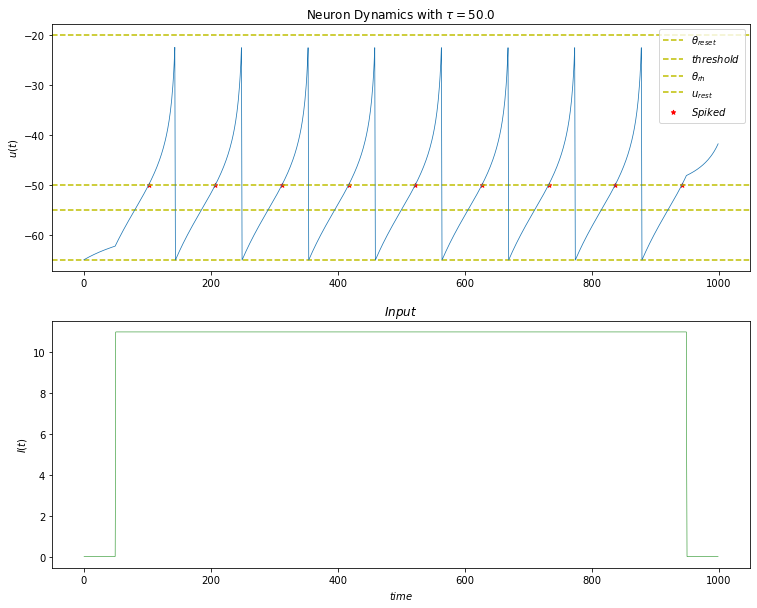

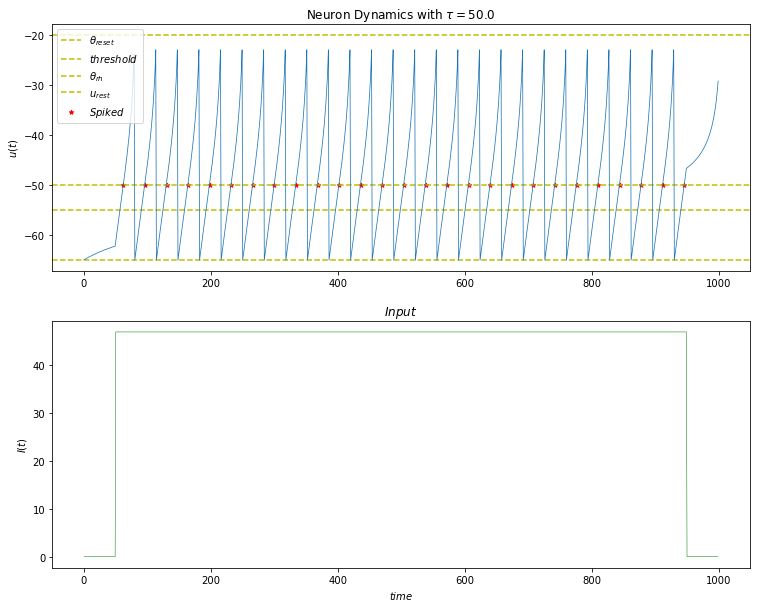

In [23]:
if save_monitor_states:
    # for i in range(0, len(step_currents), num_steps // 4):
    for i in [0, 2, -2]:
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
else:
    time_plot(monitor, plot_spikes=False, figsize=(12.5, 10))

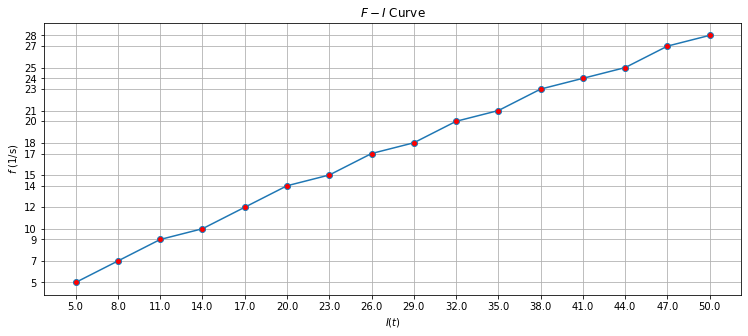

In [24]:
fi_curve(currents, frequencies)

By observing the results of the three previous simulations, we conclude that
the effect of $\Delta_T$ is not very high on the neuron's activity, specially if
the value becomes higher than a certain level. i.e., the difference of
raising it from 5 to 10, is more significant compared to when we raise the value
from 10 to 20. Also, the lower the input current is, the effect of changing
the $\Delta_T$ is more visible.

### With noise: $\sigma_{noise} = 5$

In [25]:
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_4,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=10,
        neuron_type=neuron_type,
        noise_std=5,
        line_slop=0
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 6.652s
Currents: [ 5. 11. 17. 23. 29. 35. 41. 47.]
frequencies: [ 5  8 12 15 18 21 24 27]


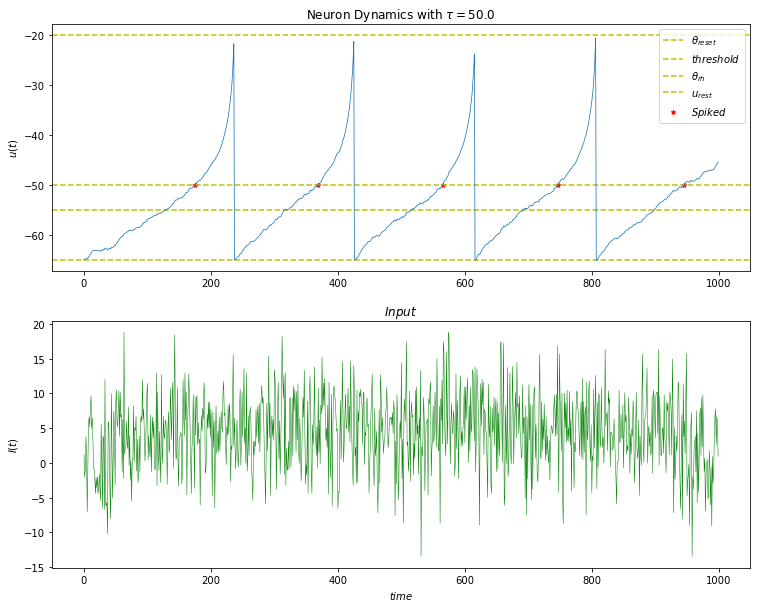

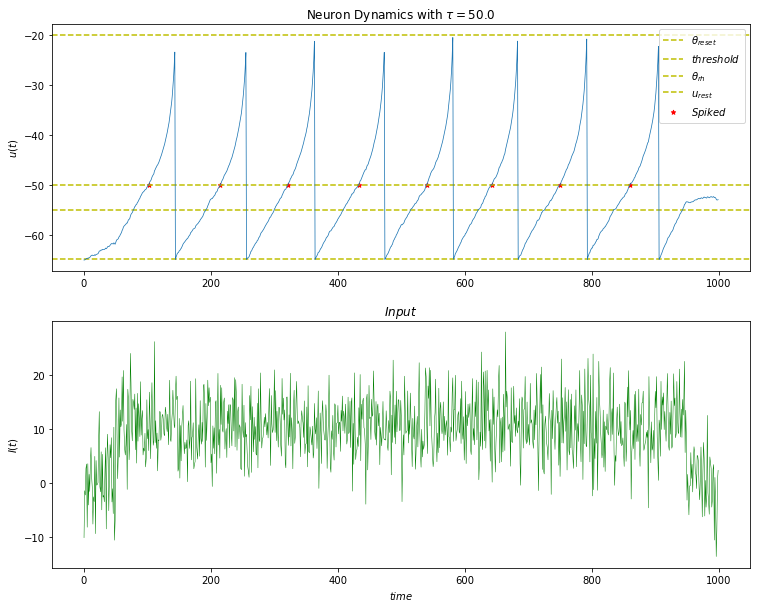

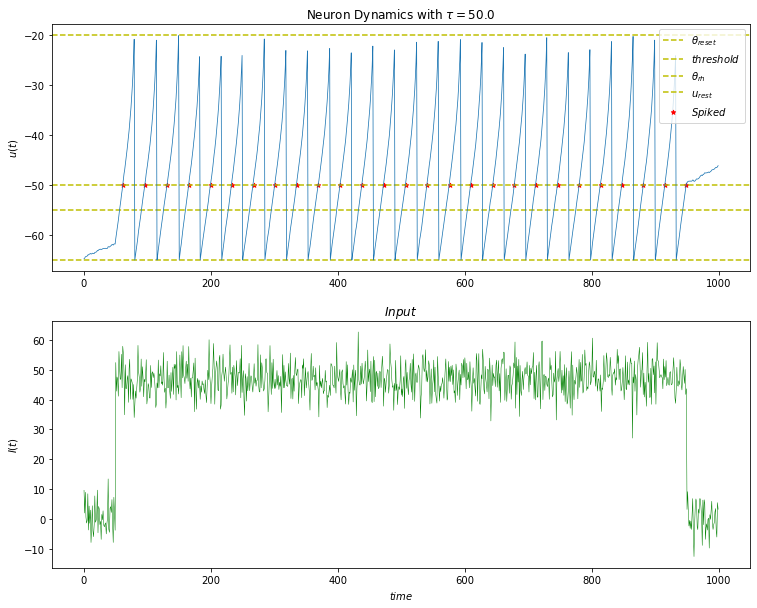

In [26]:
if save_monitor_states:
    # for i in range(0, len(step_currents), num_steps // 4):
    for i in [0, 2, -2]:
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
else:
    time_plot(monitor, plot_spikes=False, figsize=(12.5, 10))

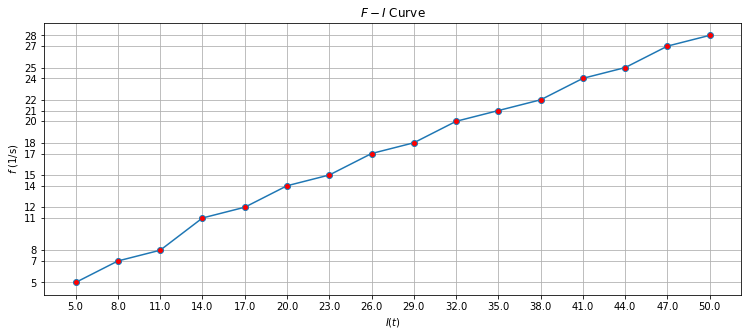

In [27]:
fi_curve(currents, frequencies)

As expected, applying noise do not have a significant impact on the neuron's
activity.

In the next parameter set, we test the effect of $\theta_{rh}$. We expect that
if we make its value lower, the firing rate will be increased, since the neuron
reaches to it faster, and after reaching that threshold, the potential
increases exponentially.

## Simulation with neuron_params_5
$\Delta_T = 5$,
$\tau = 50$,
$\theta_{reset} = -20mv$,
$\theta_{rh} = -60mv$,


### Without noise:

In [28]:
neuron_params_5 = {'threshold': -50, 'u_rest': -65, 'tau': 50,
                   'delta_T': 10, 'theta_rh': -60}

currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_5,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=10,
        neuron_type=neuron_type,
        noise_std=0,
        line_slop=0
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 6.589s
Currents: [ 5. 11. 17. 23. 29. 35. 41. 47.]
frequencies: [10 14 17 21 24 27 30 33]


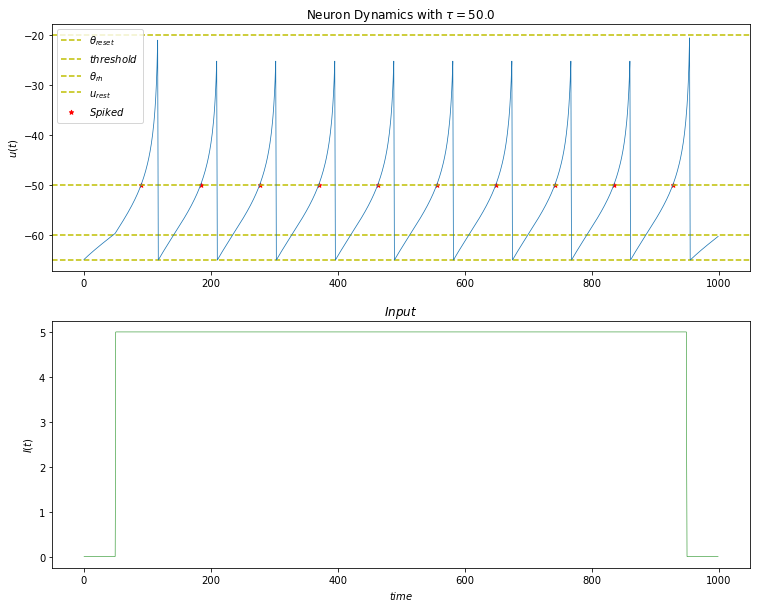

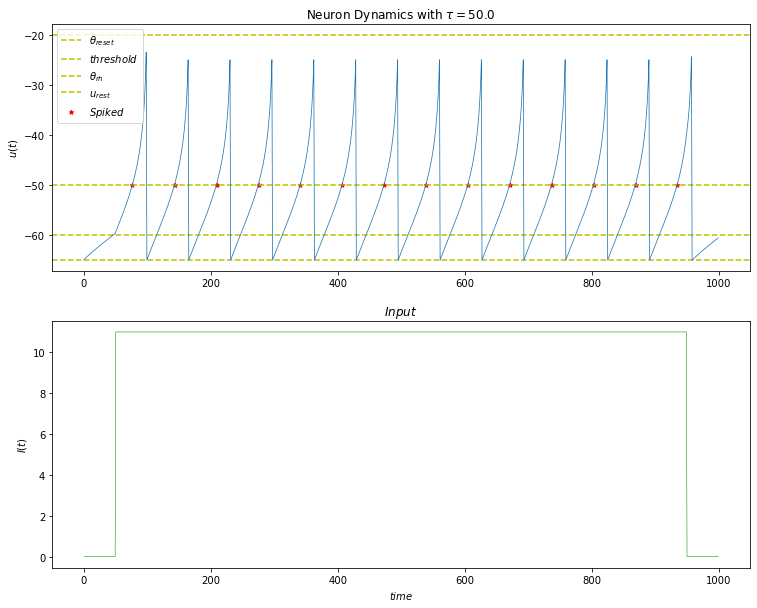

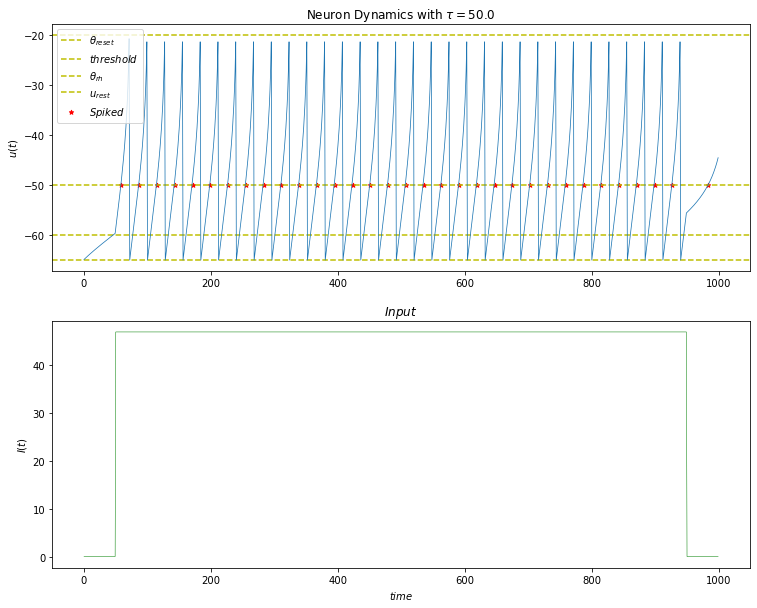

In [29]:
if save_monitor_states:
    # for i in range(0, len(step_currents), num_steps // 4):
    for i in [0, 2, -2]:
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
else:
    time_plot(monitor, plot_spikes=False, figsize=(12.5, 10))

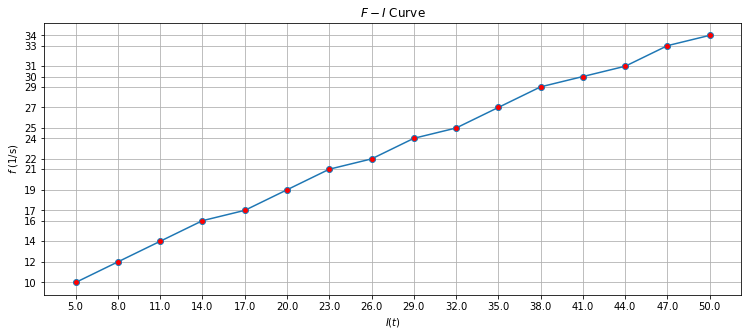

In [30]:
fi_curve(currents, frequencies)

Our hypothesis was true, as the firing rate increased with setting $\theta_{rh}$
to a lower value.

### With noise: $\sigma_{noise} = 5$

In [31]:
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_5,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=10,
        neuron_type=neuron_type,
        noise_std=5,
        line_slop=0
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 6.996s
Currents: [ 5. 11. 17. 23. 29. 35. 41. 47.]
frequencies: [10 14 18 21 24 27 30 33]


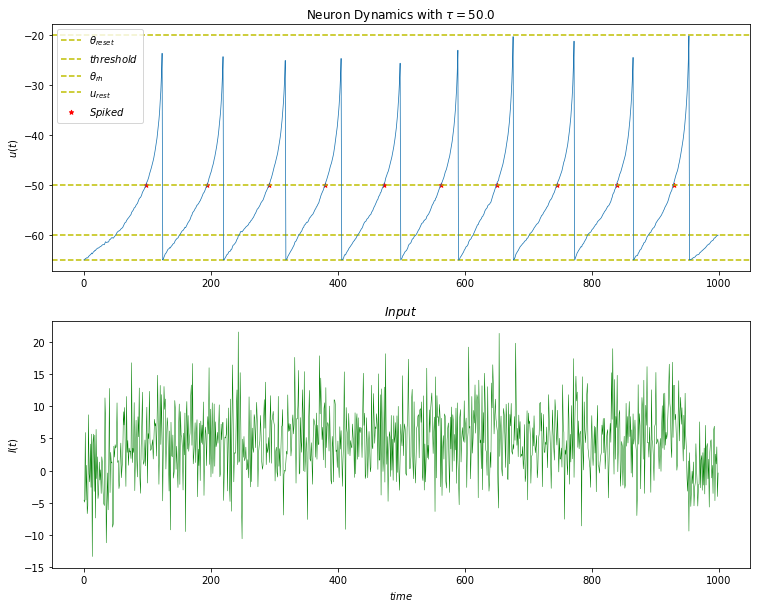

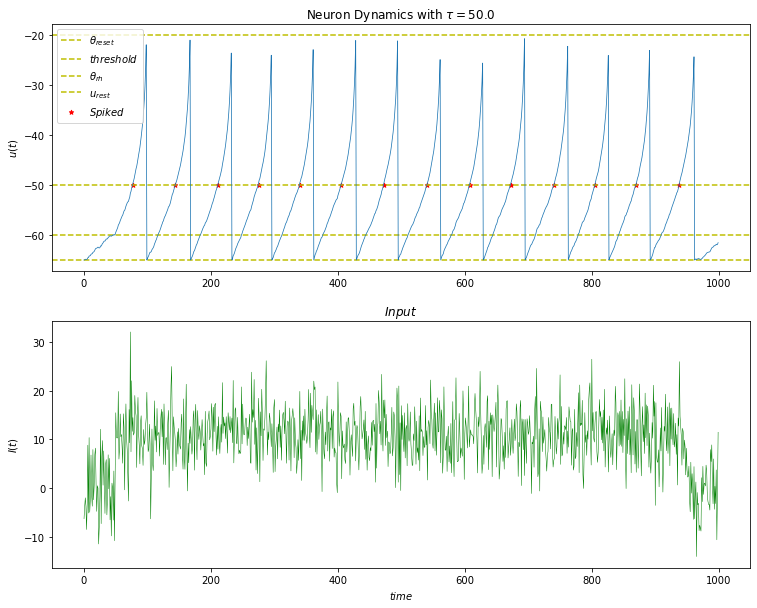

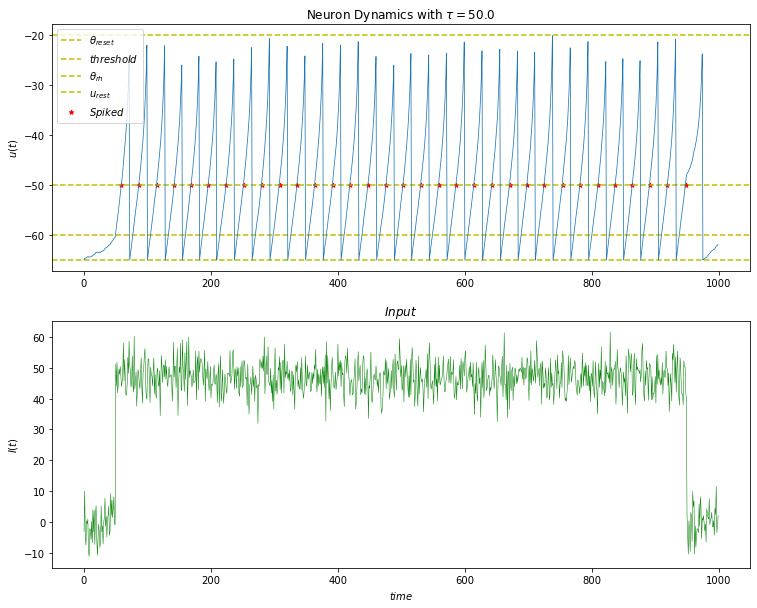

In [32]:
if save_monitor_states:
    # for i in range(0, len(step_currents), num_steps // 4):
    for i in [0, 2, -2]:
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
else:
    time_plot(monitor, plot_spikes=False, figsize=(12.5, 10))

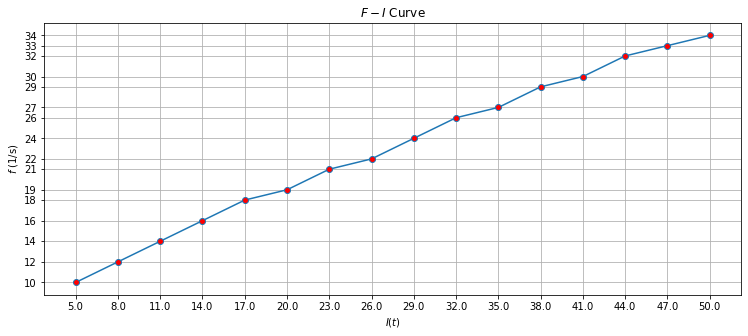

In [33]:
fi_curve(currents, frequencies)

As always, noise is not changing anything significantly.

# AELIF

Now we perform simulations for $AELIF$ neuron. The implemented update rules are as follows:


$u(t+\delta_t) = u(t) + \delta_t/\tau[-(u(t) - u_r) + \Delta_Texp (\frac{u(t)-\theta_{rh}}{\Delta_T}) -R.w + R.I(t)]$

$w(t+\delta_t) = w(t) + \delta_t/\tau_w[a(u(t) - u_r) - w(t) + b\tau_w.is_{spiked}]$

$w_{t_0} = 0$

As $AELIF$ neuron is an extended version of $ELIF$ all we said about the latter holds
true for the former; therefore, we fix the parameters we explored in the previous
simulations and from now focus on the new parameters and their relation to old
parameters.

In [34]:
import sys
sys.path.append('..')
import numpy as np
import torch
from cnsproject.plotting.plotting import time_plot, fi_curve, adaptation_plot
from cnsproject.utils import run_simulation_with_params
from cnsproject.network.neural_populations import ELIFPopulation, \
    AELIFPopulation
torch.set_default_tensor_type(torch.FloatTensor)
%matplotlib inline

In [35]:
# Initializing the simulation variables
iters = 1000
zero_percent = 2
save_monitor_states = True
neuron_type = AELIFPopulation
monitor_vars = ["potential", "s", "u_rest", "threshold", "in_current", "tau",
                "theta_rh", "theta_reset"]
if neuron_type == AELIFPopulation:
    monitor_vars.append("w")

## Simulation with neuron_params_1
$\tau_w = 200$,
$a = 0.1$,
$b = 0.1$,

### Without noise:


In [36]:
num_steps = 17
step_currents = np.linspace(2, 50, num_steps, dtype=np.float32)
neuron_params_1 = {'threshold': -50, 'u_rest': -65, 'tau': 50,
                   'delta_T': 5, 'theta_rh': -55, 'theta_reset': -20,
                   'tau_w': 200, 'a': 0.1, 'b': 0.1}

In [37]:
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_1,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=20,
        neuron_type=neuron_type,
        noise_std=0,
        line_slop=0
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 9.538s
Currents: [ 2.  8. 14. 20. 26. 32. 38. 44. 50.]
frequencies: [ 0  3  8 12 15 19 22 25 28]


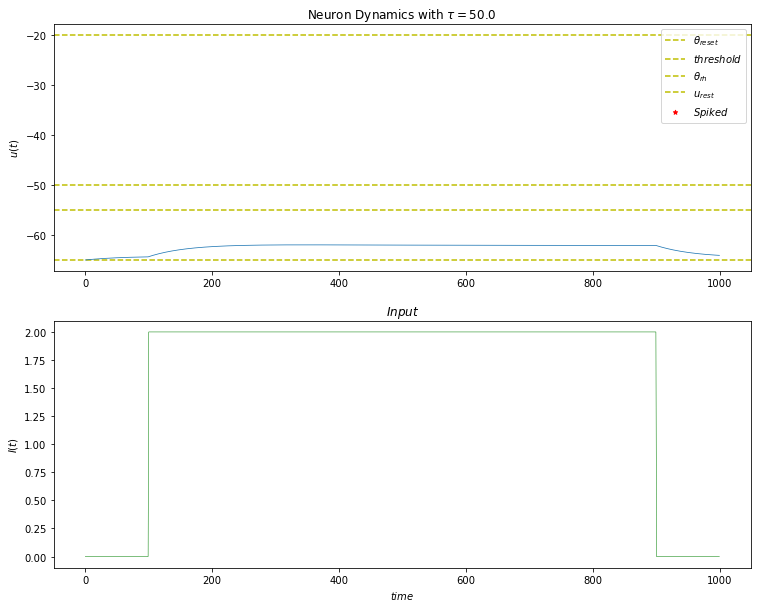

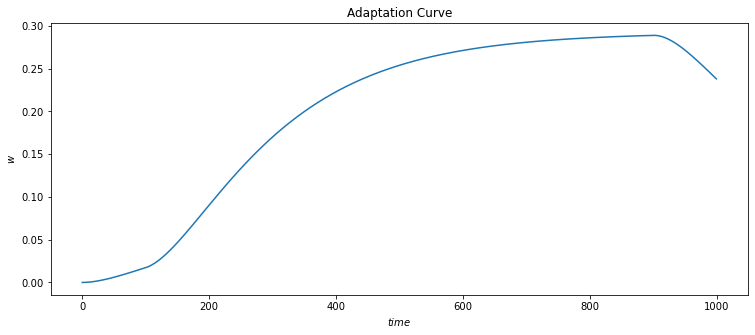

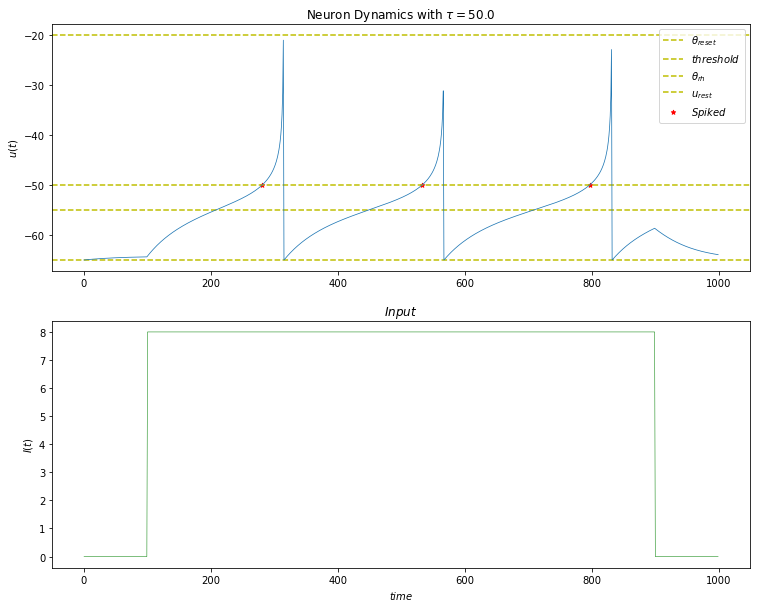

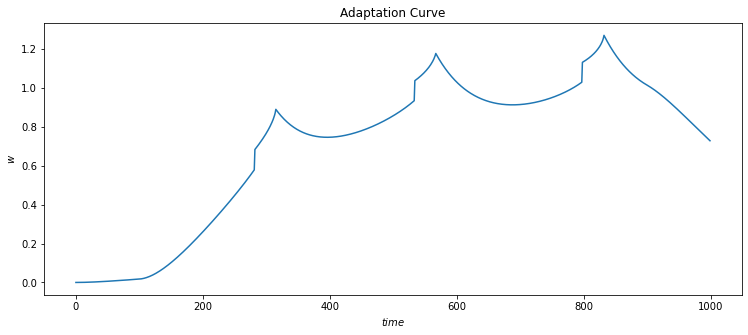

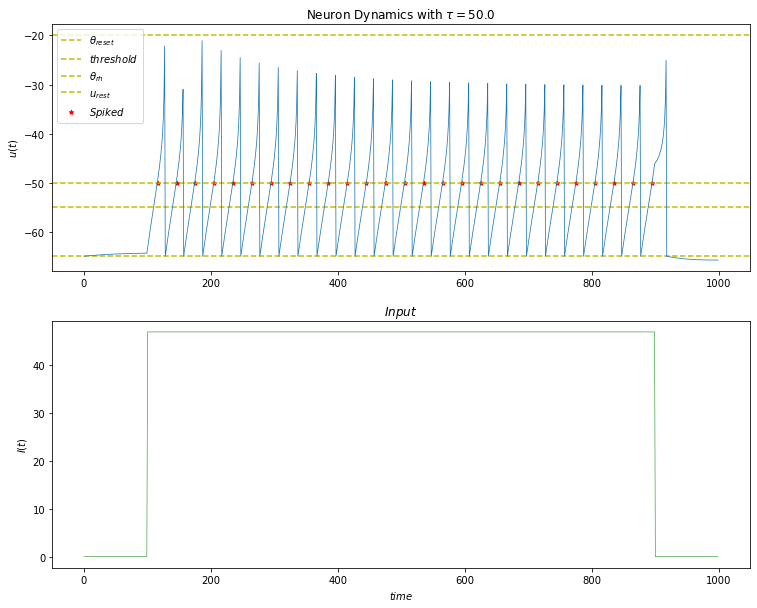

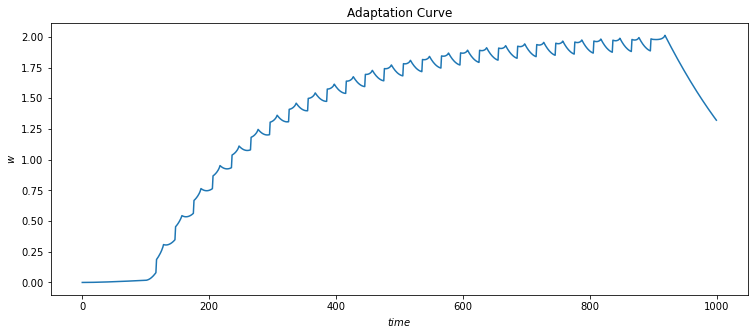

In [38]:
if save_monitor_states:
    # for i in range(0, len(step_currents), num_steps // 4):
    for i in [0, 2, -2]:
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
        adaptation_plot(monitor_states[i])
else:
    time_plot(monitor, plot_spikes=False, figsize=(12.5, 10))

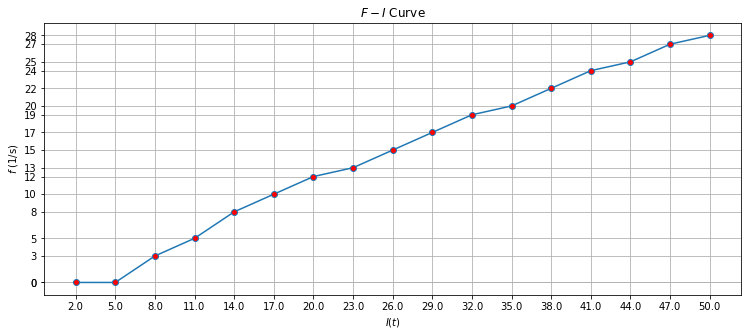

In [39]:
fi_curve(currents, frequencies)

### With noise: $\sigma_{noise} = 3$

In [40]:
num_steps = 17
step_currents = np.linspace(2, 50, num_steps, dtype=np.float32)
neuron_params_1 = {'threshold': -50, 'u_rest': -65, 'tau': 50,
                   'delta_T': 5, 'theta_rh': -55, 'theta_reset': -20,
                   'tau_w': 200, 'a': 0.1, 'b': 0.1}

In [41]:
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_1,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=20,
        neuron_type=neuron_type,
        noise_std=3,
        line_slop=0
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 9.512s
Currents: [ 2.  8. 14. 20. 26. 32. 38. 44. 50.]
frequencies: [ 0  3  8 12 15 19 22 25 28]


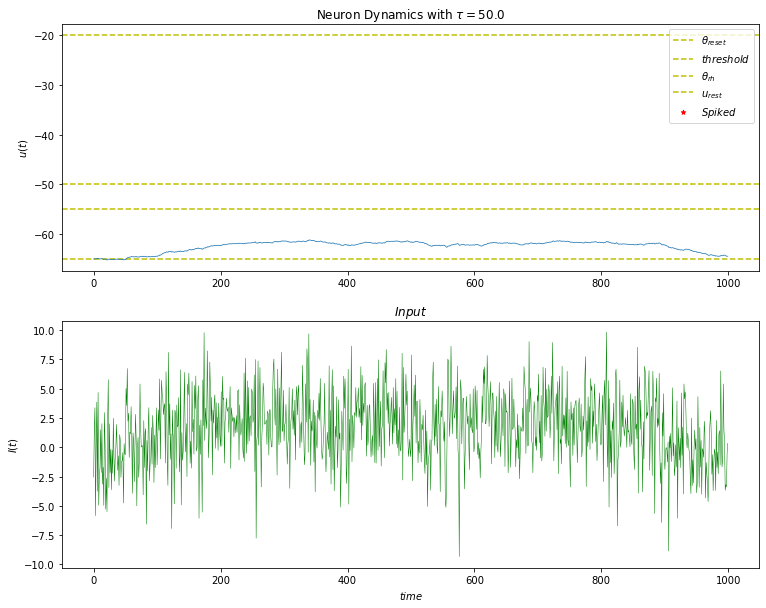

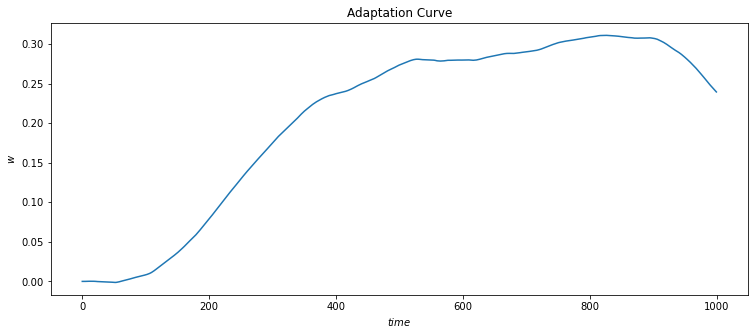

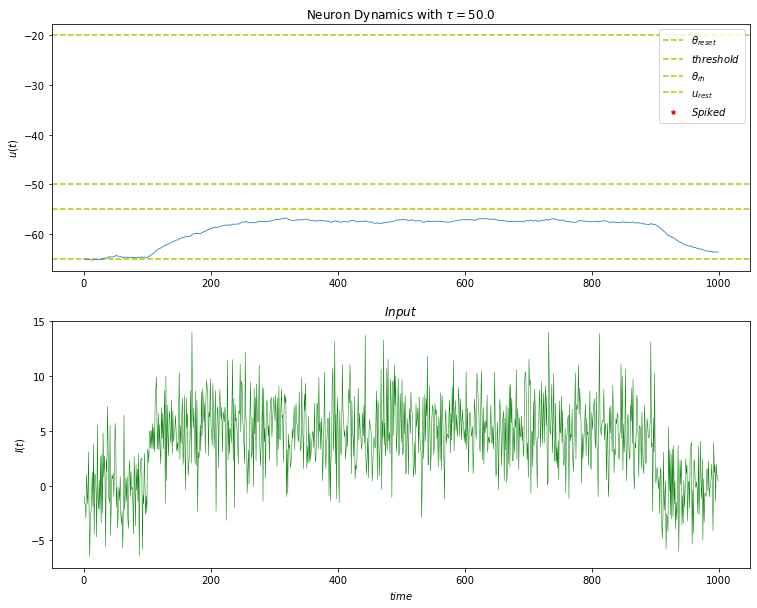

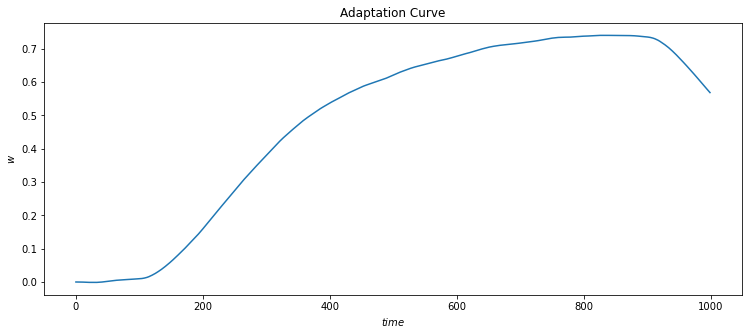

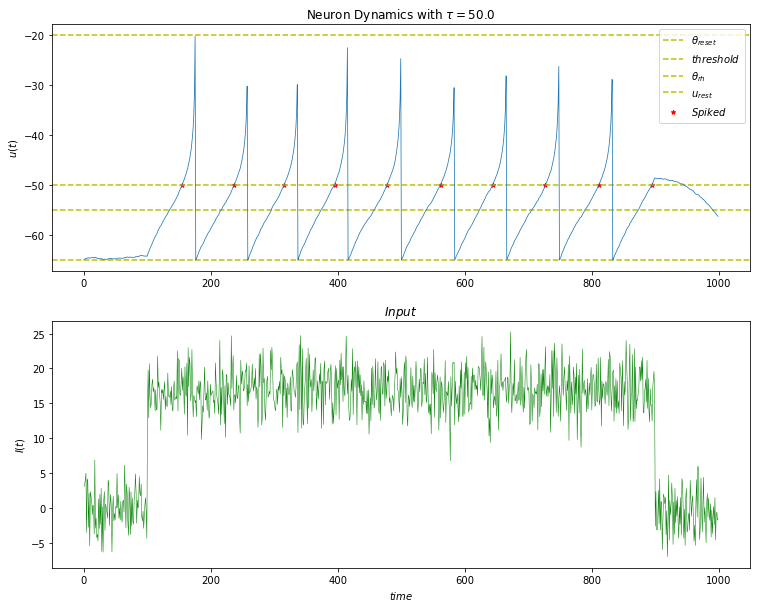

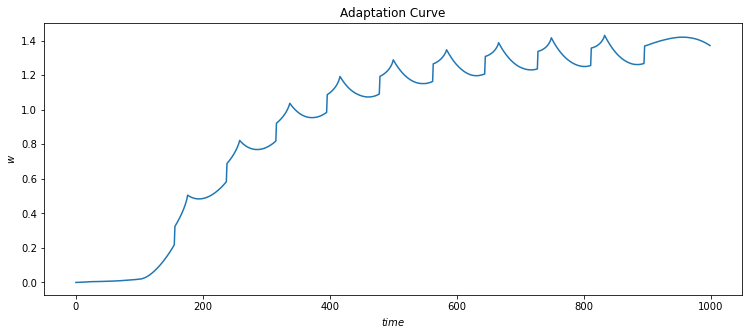

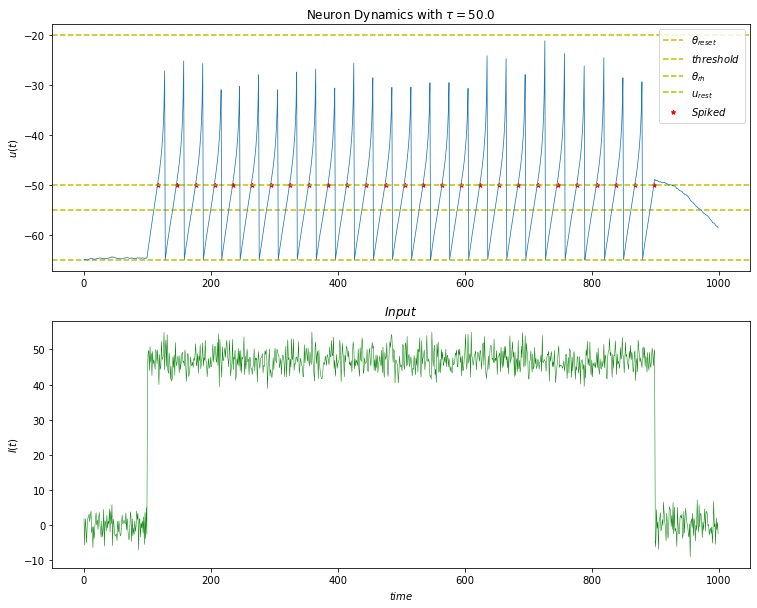

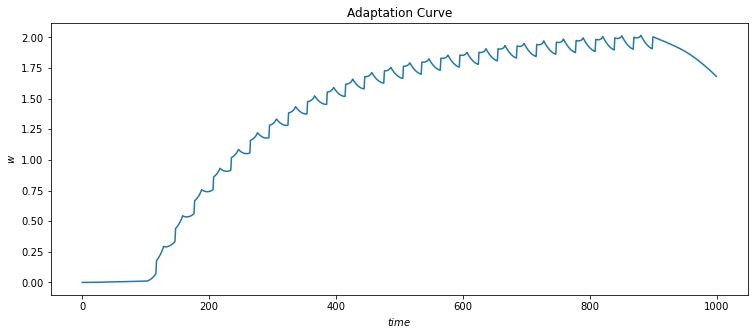

In [42]:
if save_monitor_states:
    # for i in range(0, len(step_currents), num_steps // 4):
    for i in [0, 1, 5, -2]:
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
        adaptation_plot(monitor_states[i])
else:
    time_plot(monitor, plot_spikes=False, figsize=(12.5, 10))

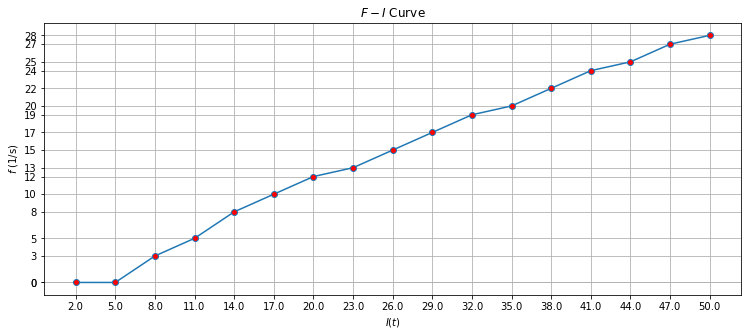

In [43]:
fi_curve(currents, frequencies)

### With noise: $\sigma_{noise} = 5$

In [44]:
num_steps = 17
step_currents = np.linspace(2, 50, num_steps, dtype=np.float32)
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_1,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=20,
        neuron_type=neuron_type,
        noise_std=5,
        line_slop=0
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 9.899s
Currents: [ 2.  8. 14. 20. 26. 32. 38. 44. 50.]
frequencies: [ 0  3  8 11 15 18 22 25 28]


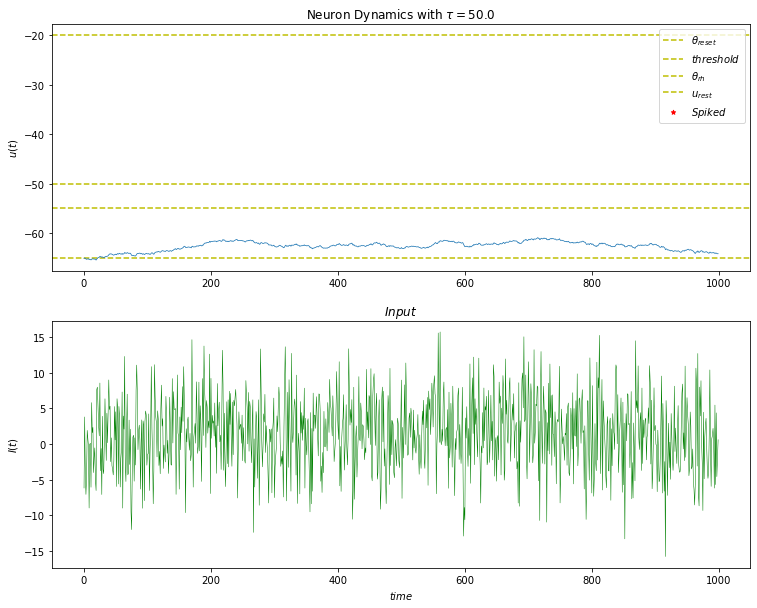

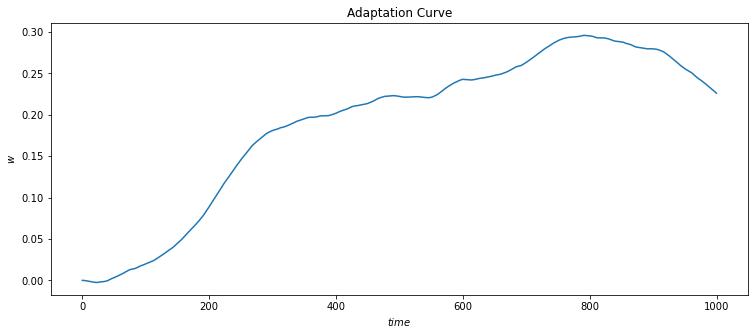

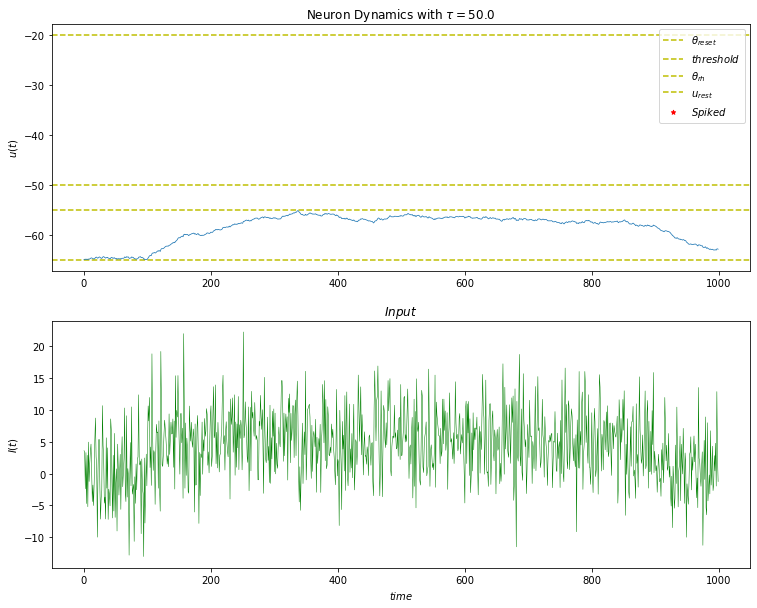

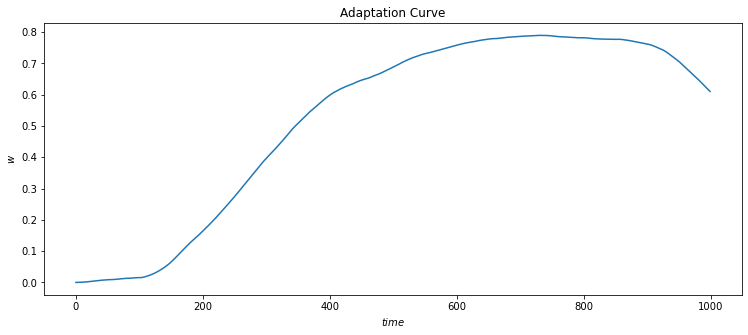

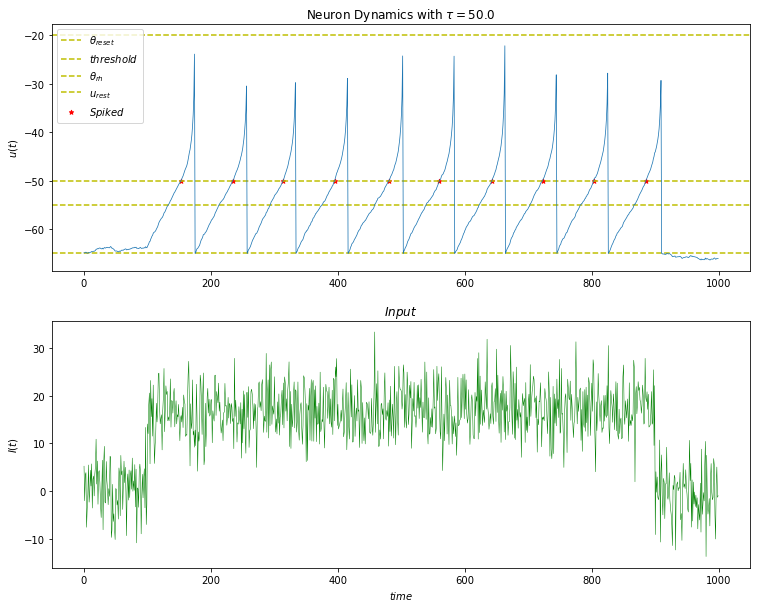

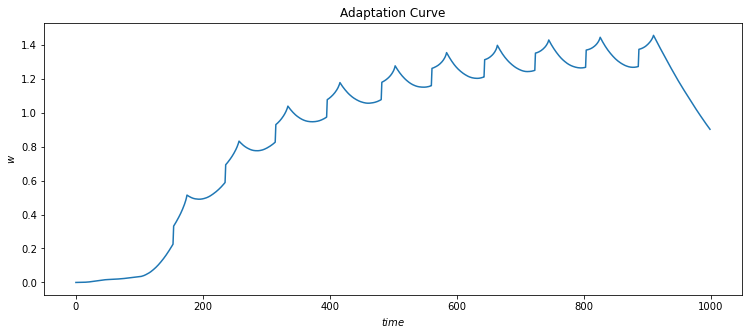

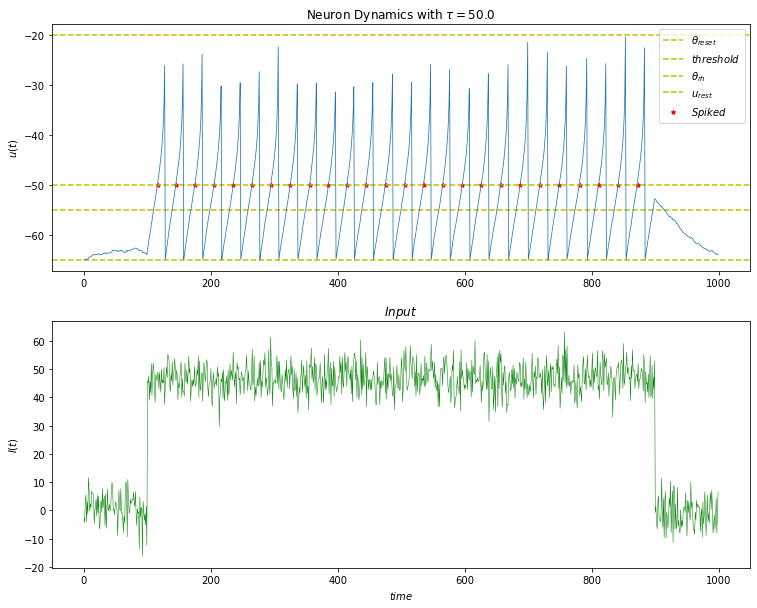

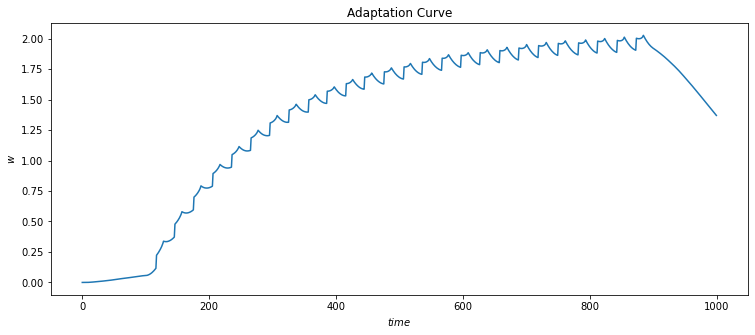

In [45]:
if save_monitor_states:
    # for i in range(0, len(step_currents), num_steps // 4):
    for i in [0, 1, 5, -2]:
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
        adaptation_plot(monitor_states[i])
else:
    time_plot(monitor, plot_spikes=False, figsize=(12.5, 10))

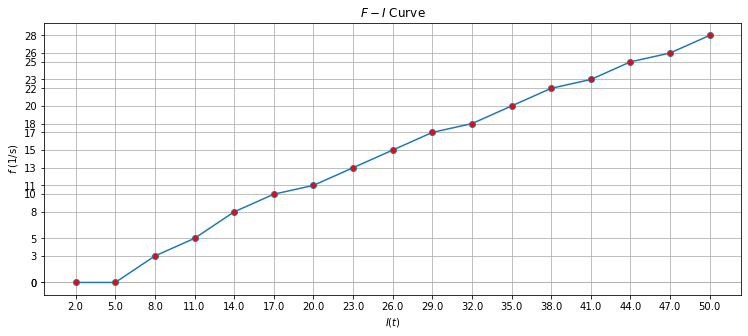

In [46]:
fi_curve(currents, frequencies)

Noise is not effective as expected.

In the next parameter set we explore the effect of changing a

## Simulation with neuron_params_2
$\tau_w = 200$,
$a = 1$,
$b = 0.1$,

### Without noise:

In [47]:
neuron_params_2 = {'threshold': -50, 'u_rest': -65, 'tau': 50,
                   'delta_T': 5, 'theta_rh': -55, 'theta_reset': -20,
                   'tau_w': 200, 'a': 1, 'b': 0.1}

In [48]:
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_2,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=20,
        neuron_type=neuron_type,
        noise_std=0,
        line_slop=0
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 9.831s
Currents: [ 2.  8. 14. 20. 26. 32. 38. 44. 50.]
frequencies: [ 0  0  2  7 10 14 17 20 23]


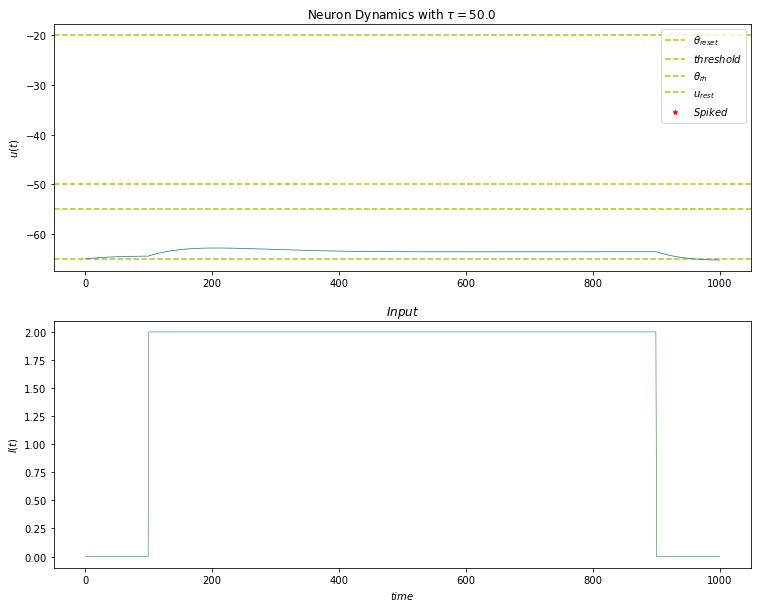

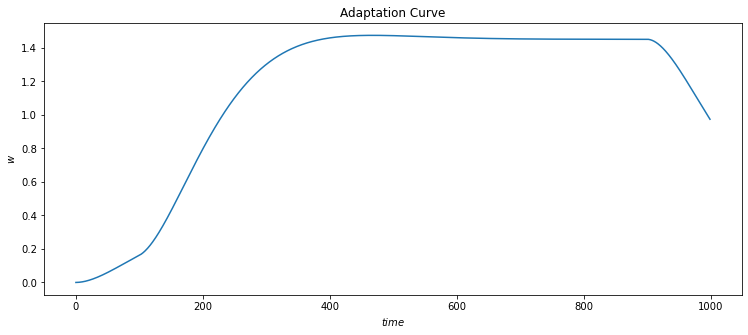

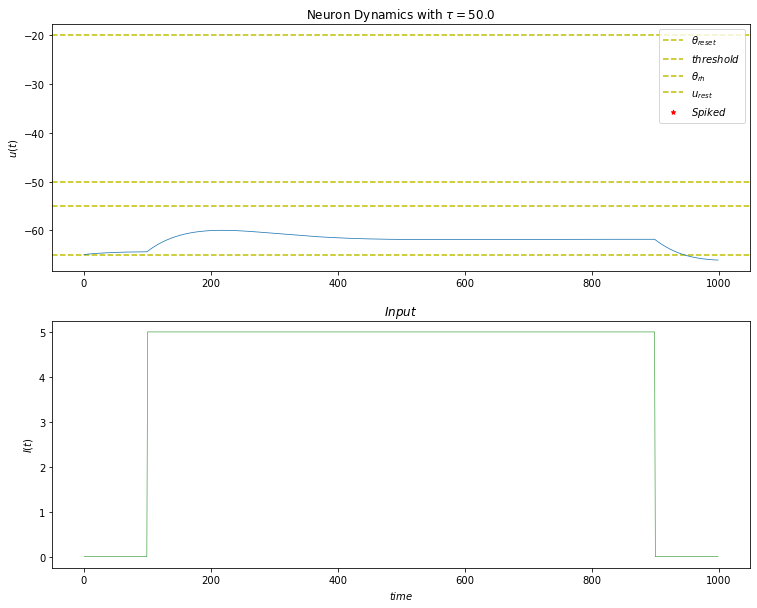

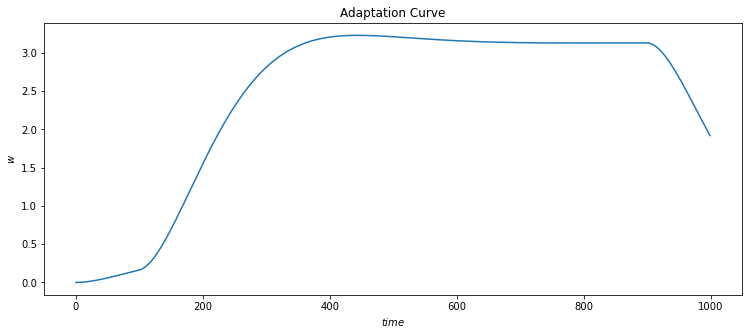

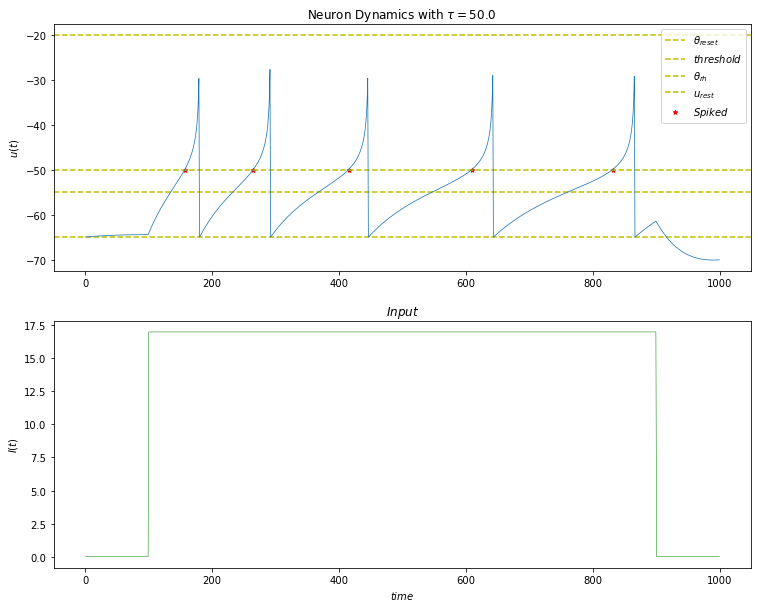

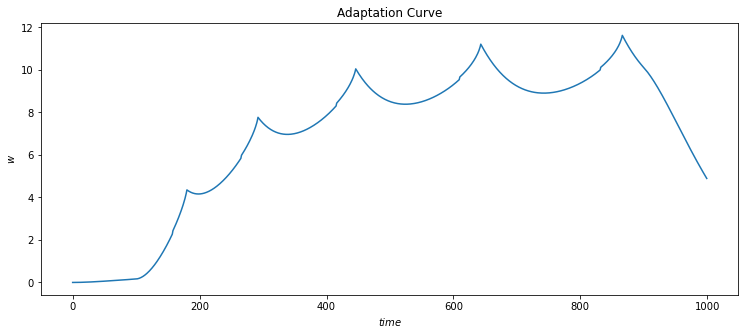

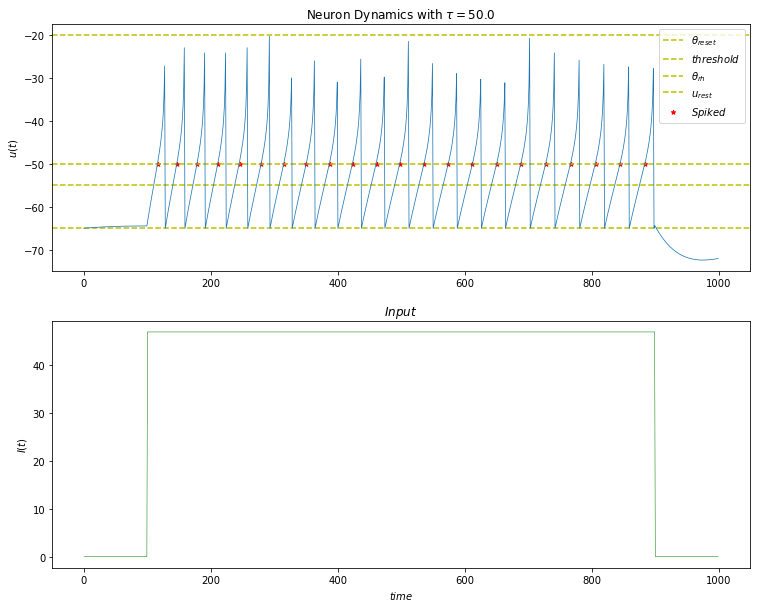

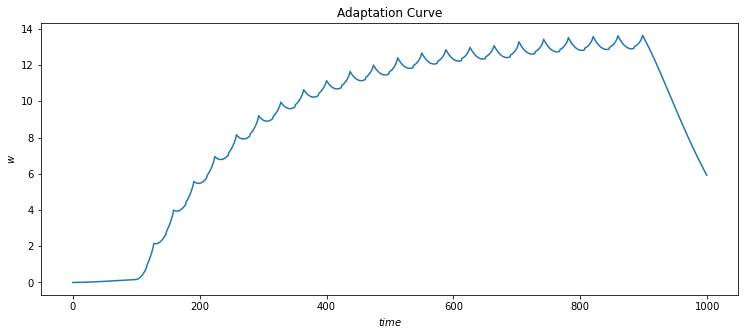

In [49]:
if save_monitor_states:
    # for i in range(0, len(step_currents), num_steps // 4):
    for i in [0, 1, 5, -2]:
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
        adaptation_plot(monitor_states[i])
else:
    time_plot(monitor, plot_spikes=False, figsize=(12.5, 10))

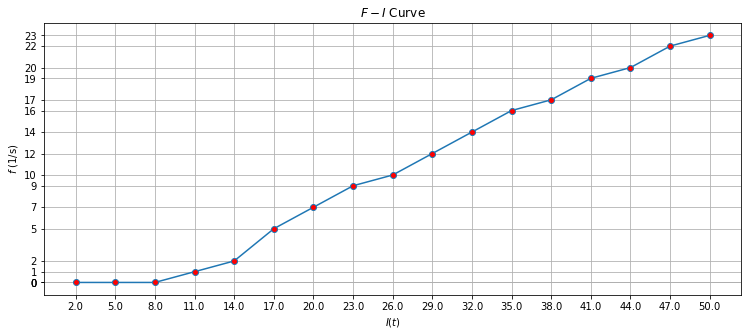

In [50]:
fi_curve(currents, frequencies)

### With noise: $\sigma_{noise} = 5$

In [51]:
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_2,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=20,
        neuron_type=neuron_type,
        noise_std=5,
        line_slop=0
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 9.406s
Currents: [ 2.  8. 14. 20. 26. 32. 38. 44. 50.]
frequencies: [ 0  0  2  7 10 14 17 21 23]


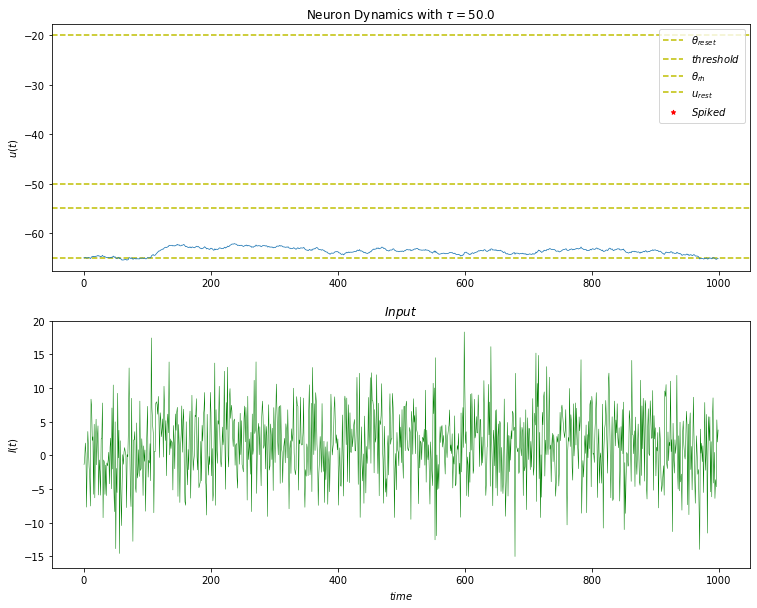

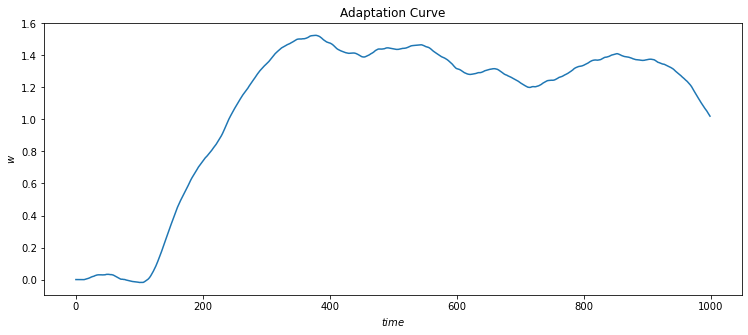

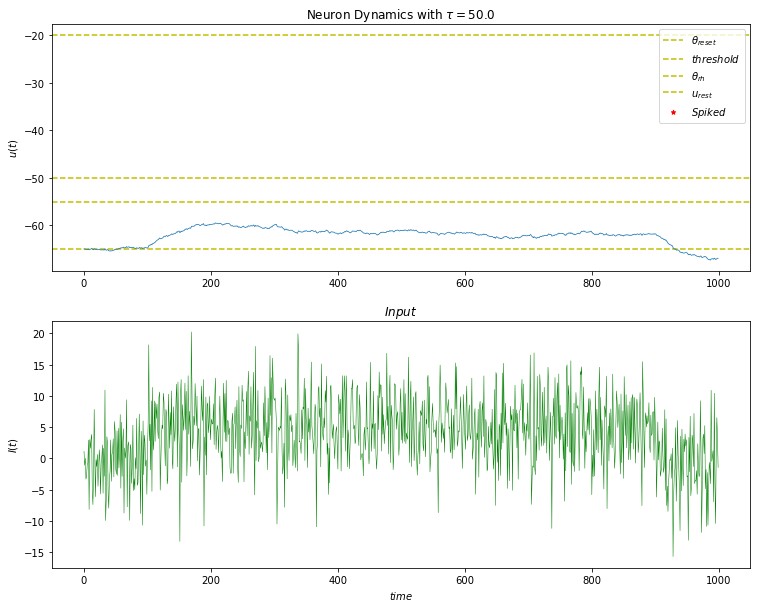

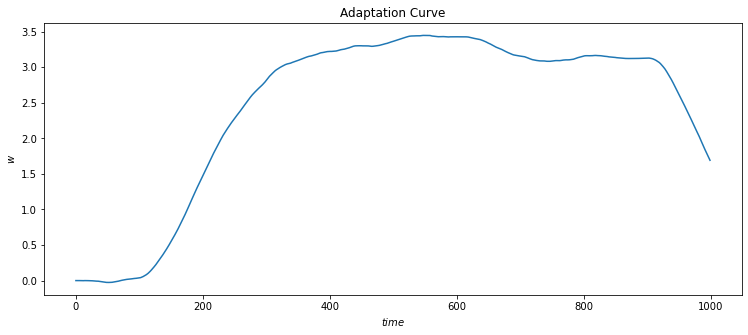

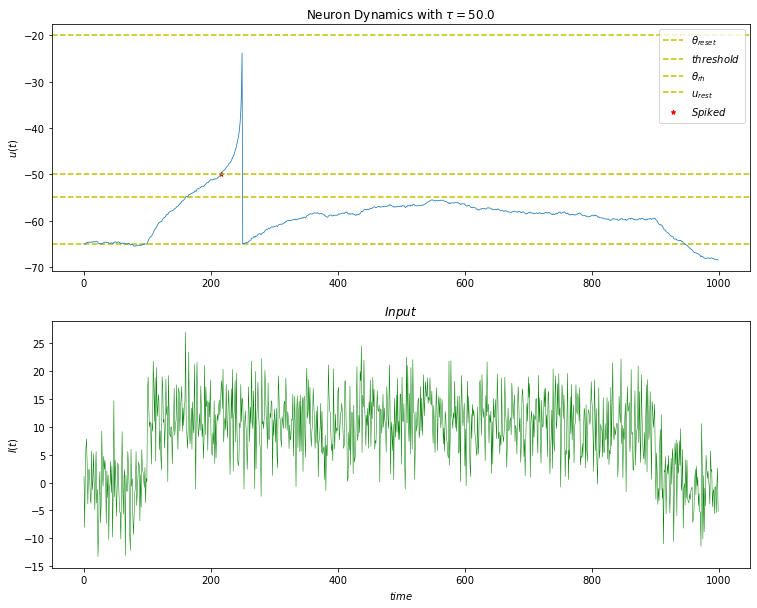

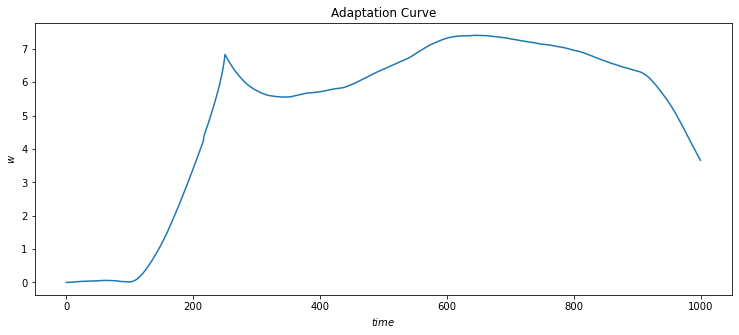

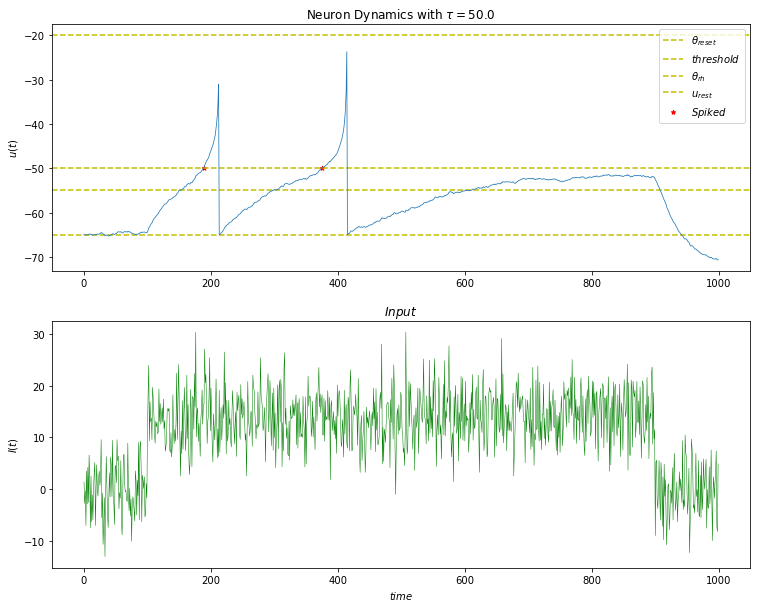

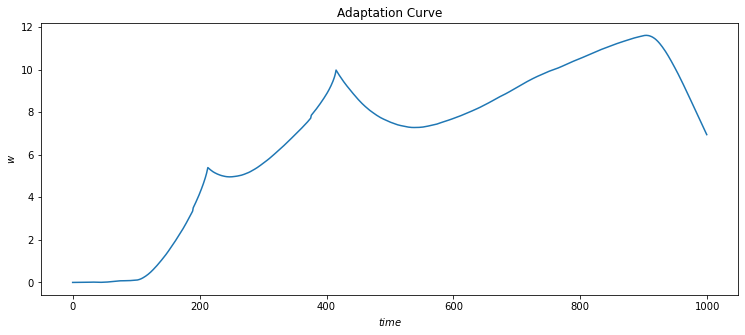

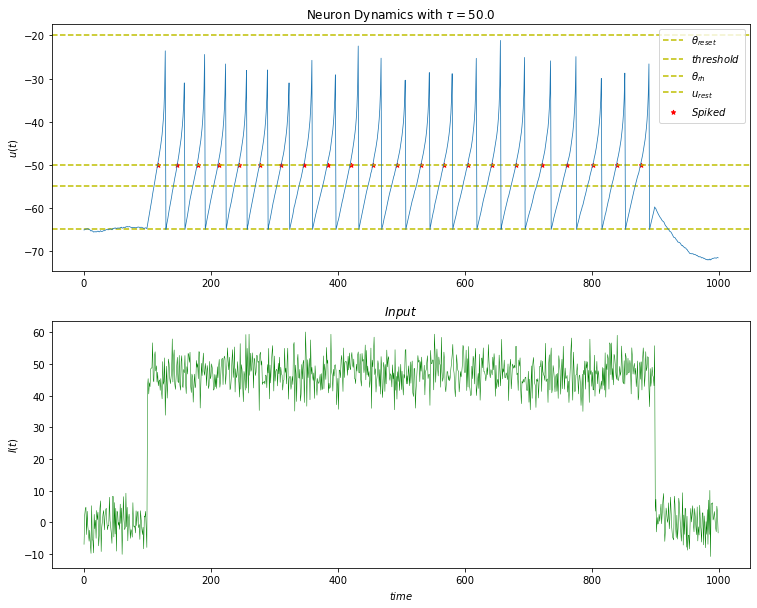

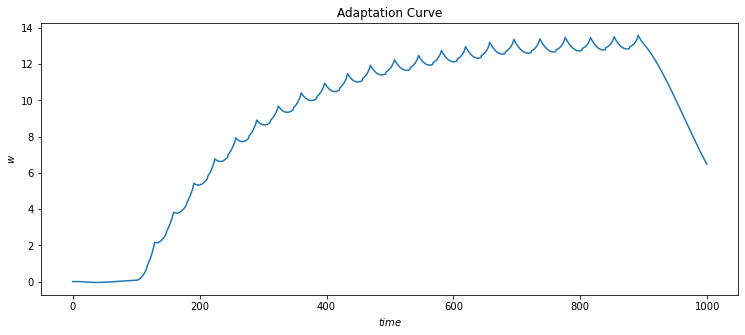

In [52]:
if save_monitor_states:
    # for i in range(0, len(step_currents), num_steps // 4):
    for i in [0, 1, 3, 4, -2]:
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
        adaptation_plot(monitor_states[i])
else:
    time_plot(monitor, plot_spikes=False, figsize=(12.5, 10))

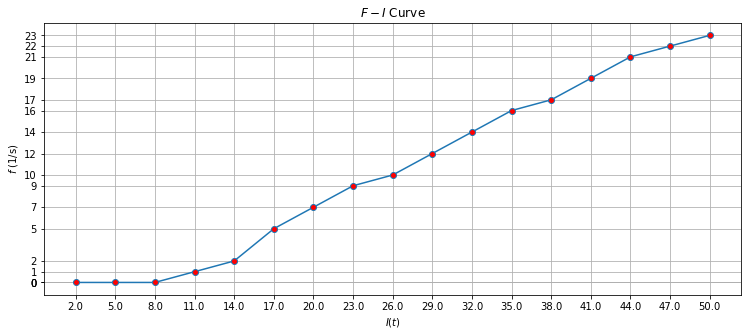

In [53]:
fi_curve(currents, frequencies)

We see that by increasing the value of $a$, in overall firing rate will be decreased.
It is expected if we look at the update formulas; since by increasing $a$, $w$ will
be increased.

Also, by adding noise to the input, if we have a high value of $a$, the neuron's
activity will be negatively affected. It is due to how the term $a(u(t) - u_r)$ is
affecting the adaptation factor. By having noise, the neuron will have a hard time
to overcome the adaptation factor since because the input is not constantly given to
the neuron, and the adaptation make the neuron's potential decrease.

Now we change the parameter b, and see its effect on the neuron's activity.

By what it is doing in the updating formula of $w$, we can expect that by increasing
its value, the neuron will adapt faster to the input, and spikes will become less frequent
faster.

## Simulation with neuron_params_3
$\tau_w = 200$,
$a = 0.1$,
$b = 2$,

### Without noise:

In [54]:
neuron_params_3 = {'threshold': -50, 'u_rest': -65, 'tau': 50,
                   'delta_T': 5, 'theta_rh': -55, 'theta_reset': -20,
                   'tau_w': 200, 'a': 0.1, 'b': 2}

In [55]:
num_steps = 17
step_currents = np.linspace(2, 50, num_steps, dtype=np.float32)
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_3,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=20,
        neuron_type=neuron_type,
        noise_std=0,
        line_slop=0
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 10.002s
Currents: [ 2.  8. 14. 20. 26. 32. 38. 44. 50.]
frequencies: [ 0  2  6  9 13 15 18 21 24]


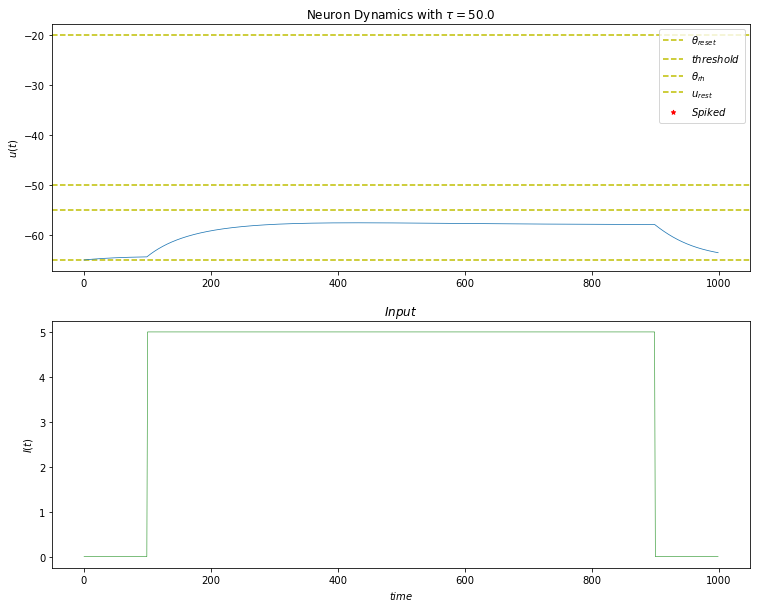

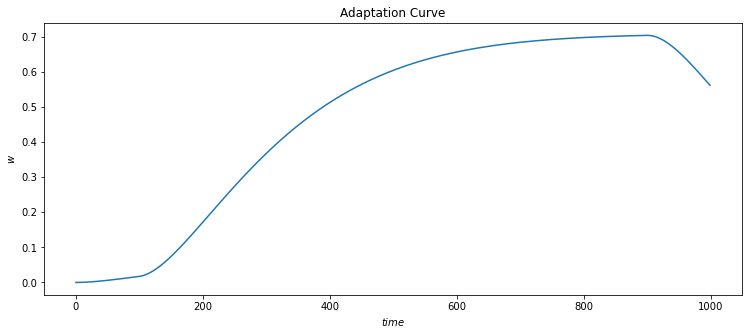

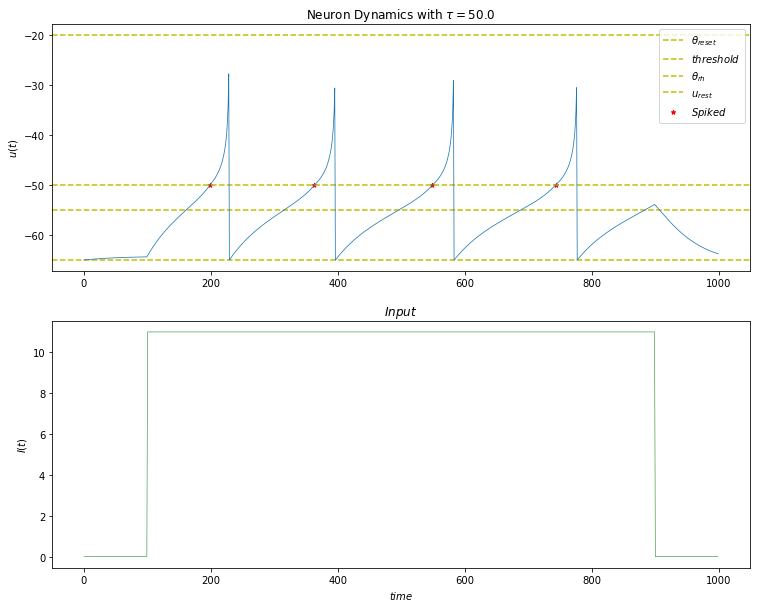

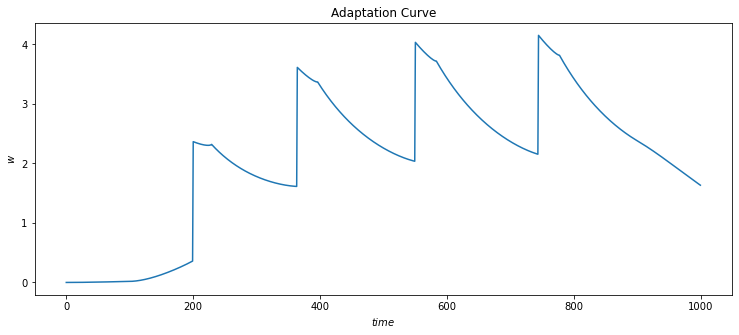

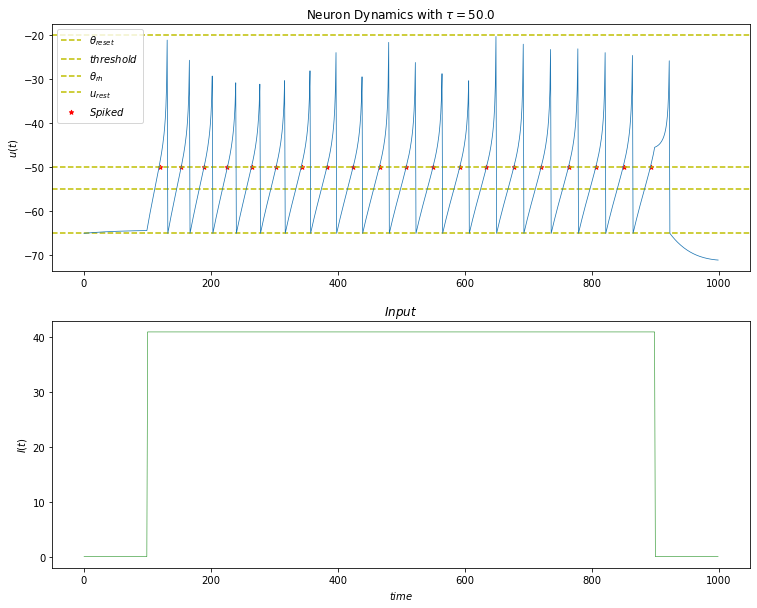

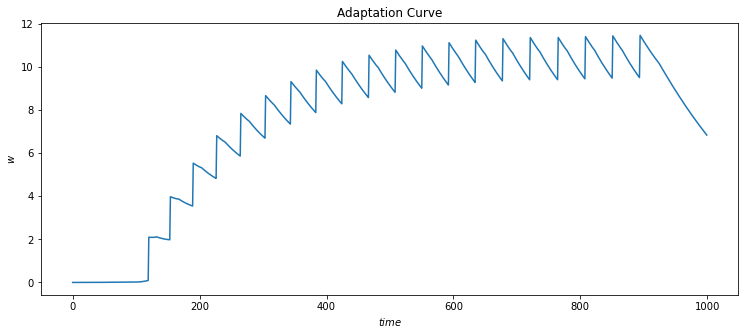

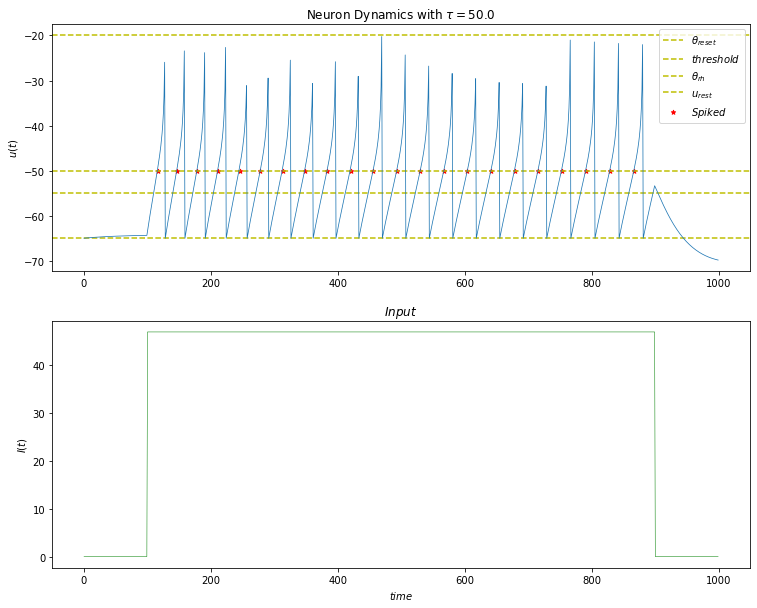

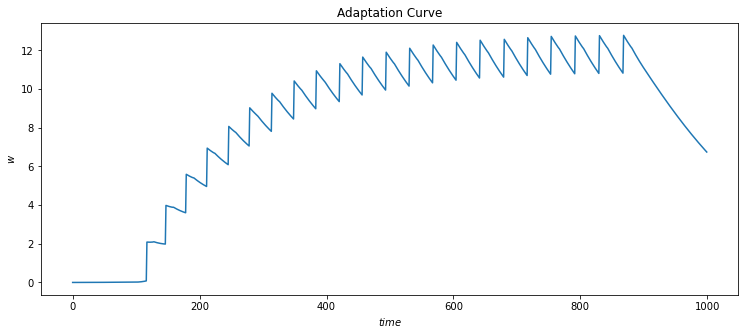

In [56]:
if save_monitor_states:
    # for i in range(0, len(step_currents), num_steps // 4):
    for i in [1, 3, -4, -2]:
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
        adaptation_plot(monitor_states[i])
else:
    time_plot(monitor, plot_spikes=False, figsize=(12.5, 10))

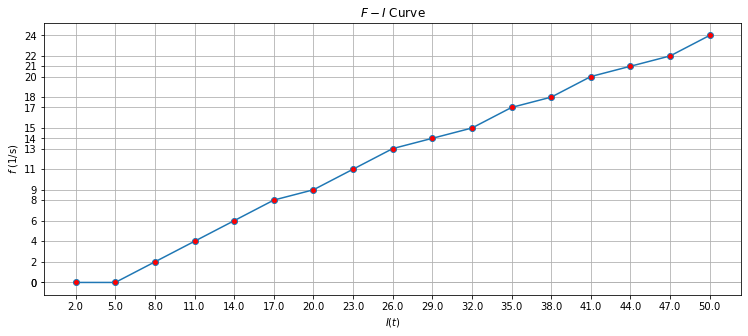

In [57]:
fi_curve(currents, frequencies)

## Simulation with neuron_params_4
$\tau_w = 200$,
$a = 0.1$,
$b = 4$,

### Without noise:

In [58]:
neuron_params_3 = {'threshold': -50, 'u_rest': -65, 'tau': 50,
                   'delta_T': 5, 'theta_rh': -55, 'theta_reset': -20,
                   'tau_w': 200, 'a': 0.1, 'b': 4}

In [59]:
num_steps = 17
step_currents = np.linspace(2, 50, num_steps, dtype=np.float32)
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_3,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=20,
        neuron_type=neuron_type,
        noise_std=0,
        line_slop=0
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 9.741s
Currents: [ 2.  8. 14. 20. 26. 32. 38. 44. 50.]
frequencies: [ 0  2  5  8 10 13 16 18 20]


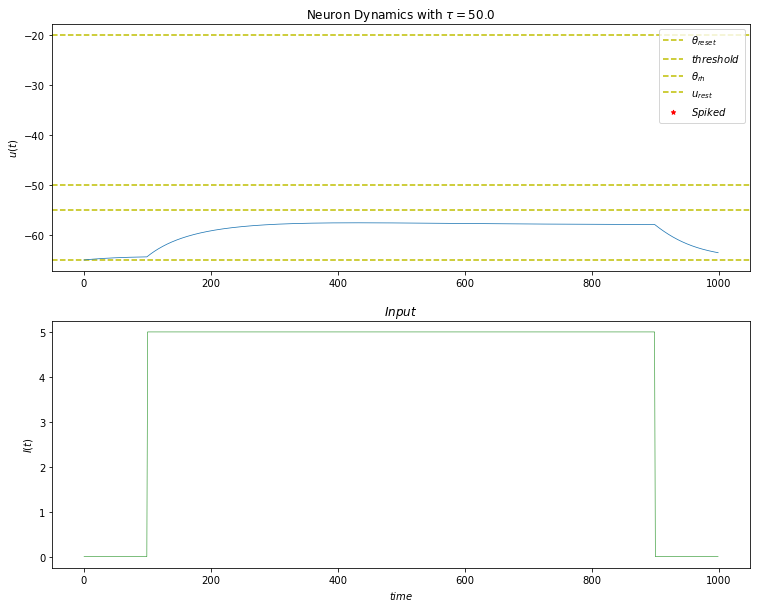

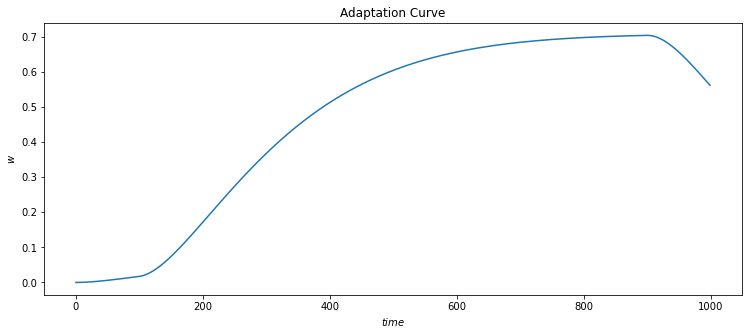

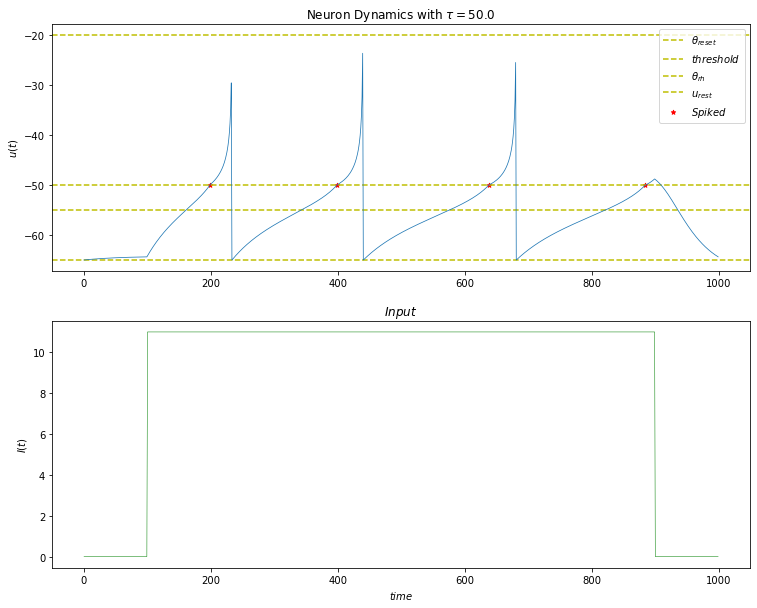

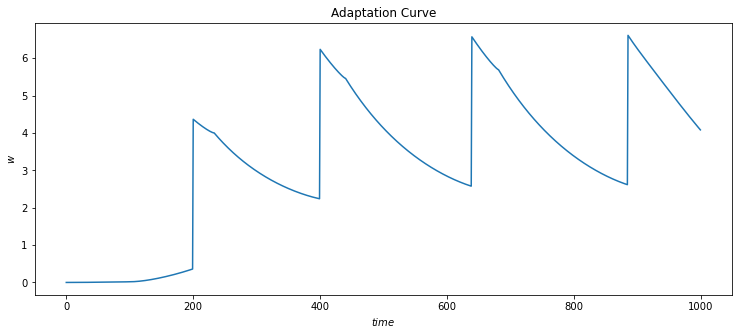

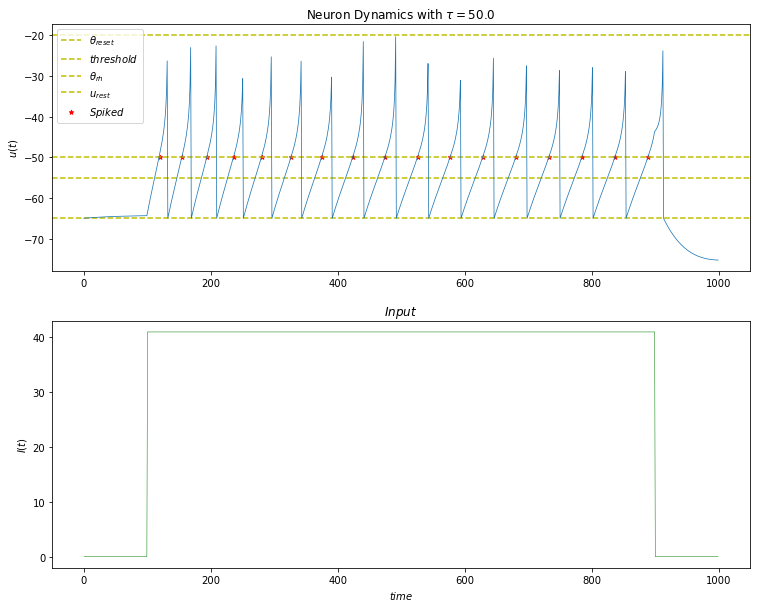

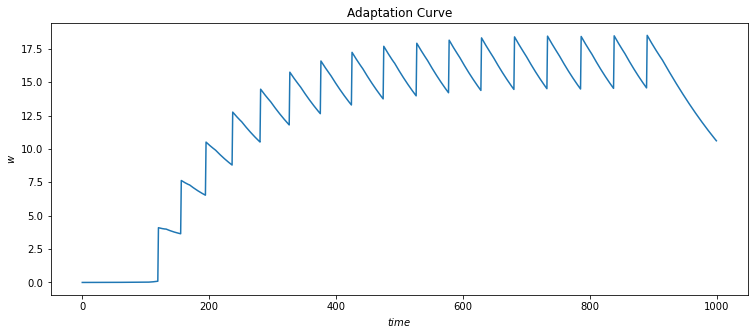

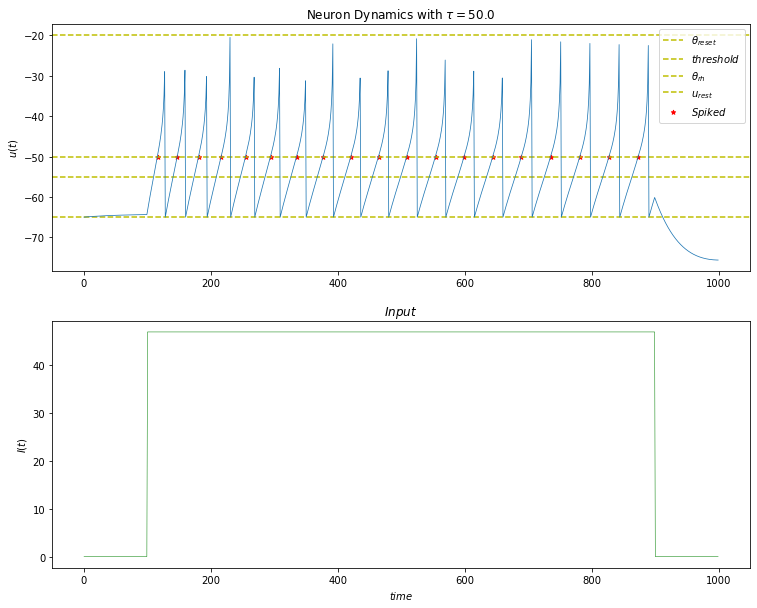

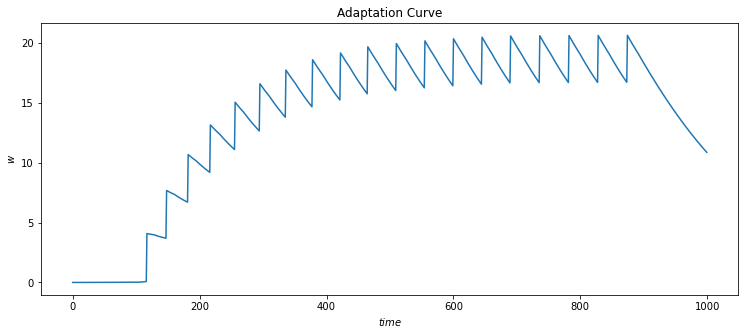

In [60]:
if save_monitor_states:
    # for i in range(0, len(step_currents), num_steps // 4):
    for i in [1, 3, -4, -2]:
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
        adaptation_plot(monitor_states[i])
else:
    time_plot(monitor, plot_spikes=False, figsize=(12.5, 10))

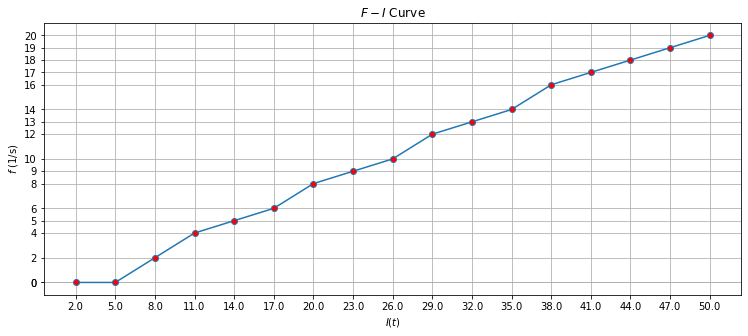

In [61]:
fi_curve(currents, frequencies)

By comparing two previous parameter set simulations (F-I curves),
we could say that by increasing the value of $b$ (and fixing the value of $\tau_w$) the overall
firing rate will be decreased as expected. By increasing $b$, every time a spike
happens, the value of $w$ will be increased more than before, so the neuron will
reach the threshold later than before.

Now we explore the effect of noise in this case:

### With noise: $\sigma_{noise} = 5$

In [62]:
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_3,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=20,
        neuron_type=neuron_type,
        noise_std=5,
        line_slop=0
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 9.343s
Currents: [ 2.  8. 14. 20. 26. 32. 38. 44. 50.]
frequencies: [ 0  2  5  8 11 13 15 18 20]


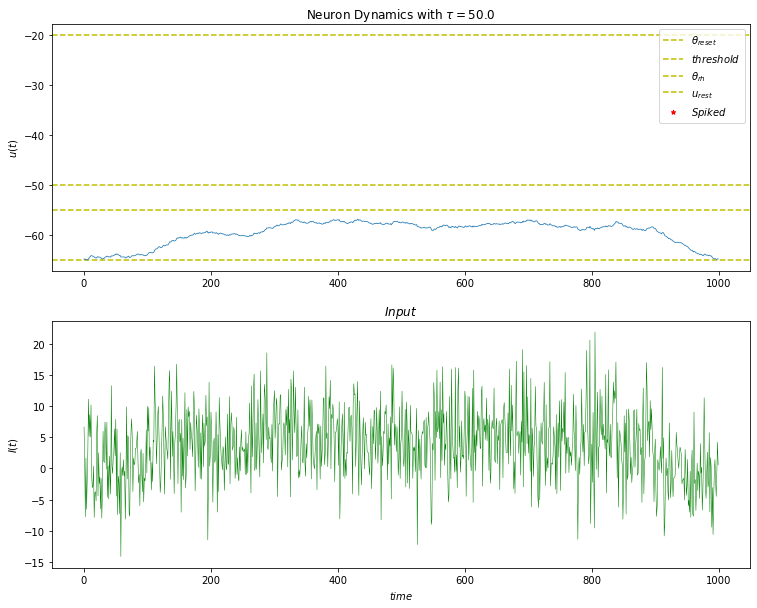

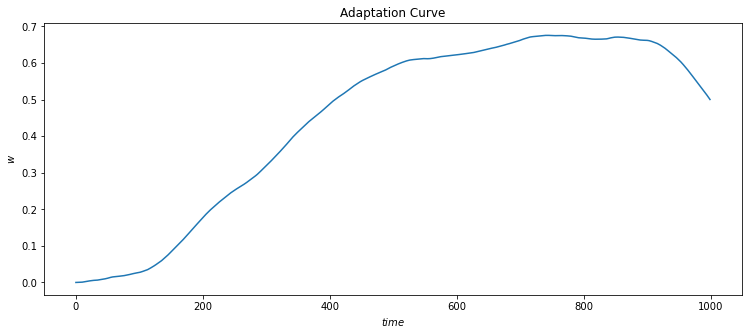

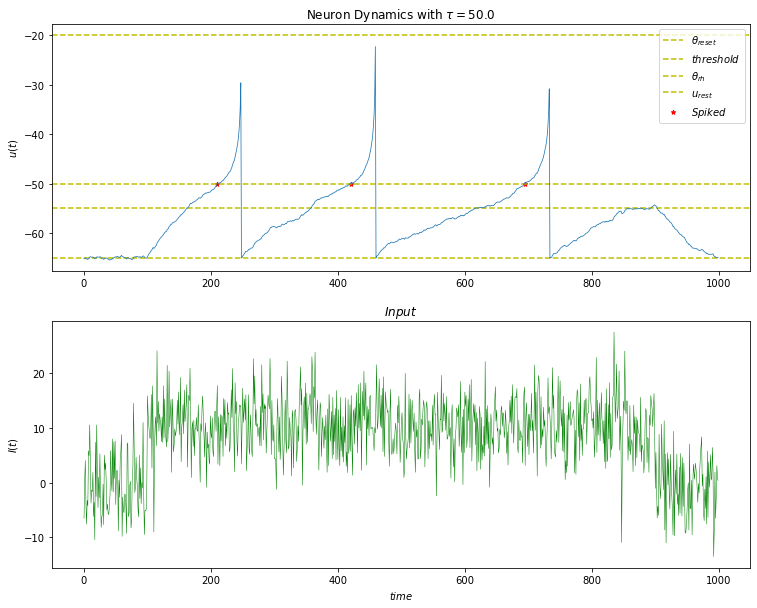

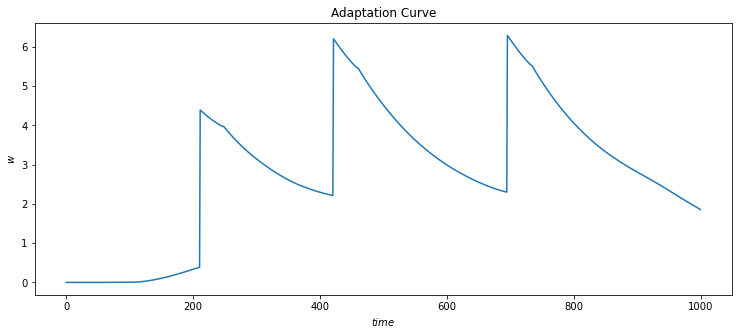

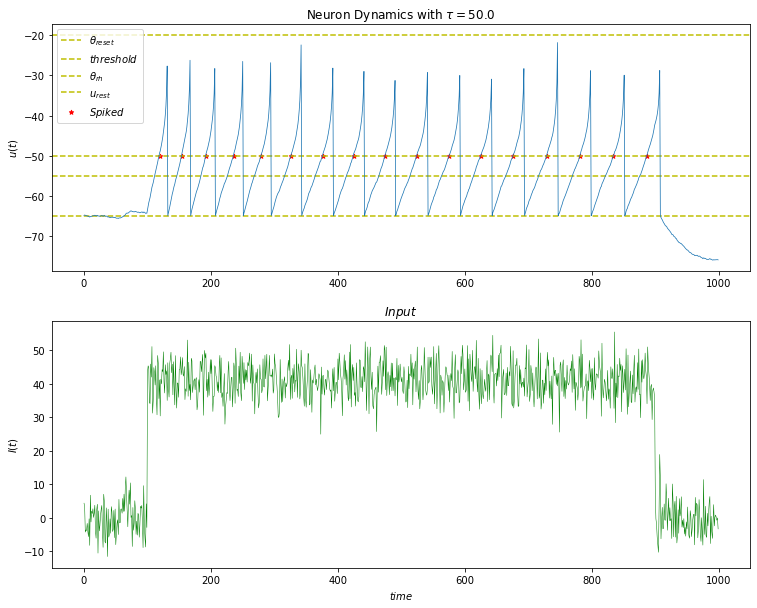

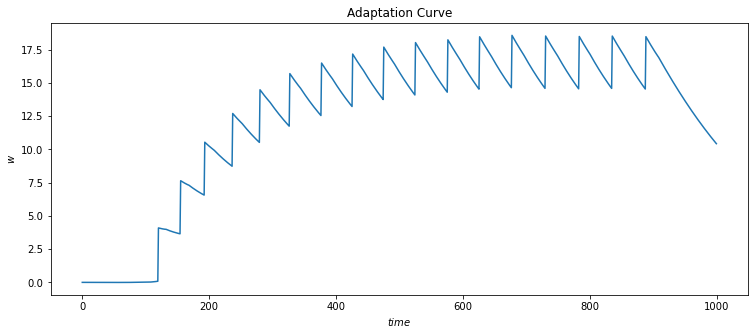

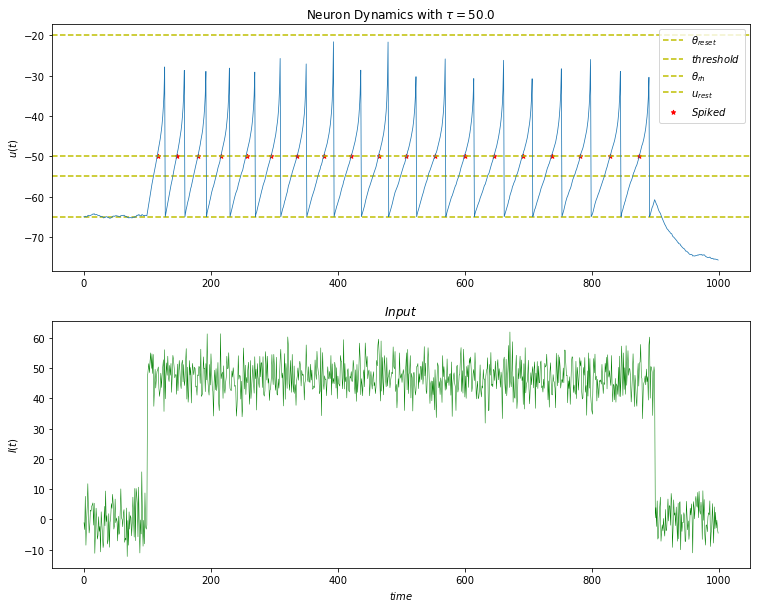

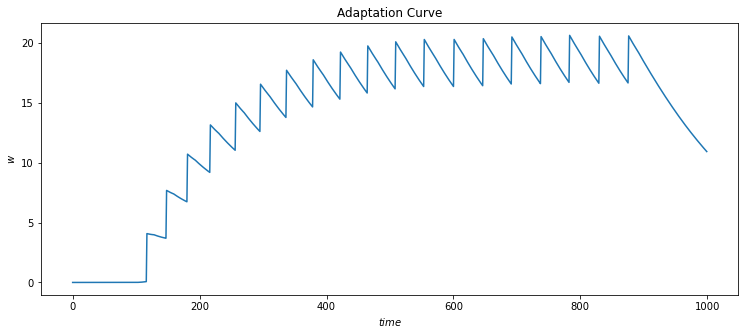

In [63]:
if save_monitor_states:
    # for i in range(0, len(step_currents), num_steps // 4):
    for i in [1, 3, -4, -2]:
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
        adaptation_plot(monitor_states[i])
else:
    time_plot(monitor, plot_spikes=False, figsize=(12.5, 10))

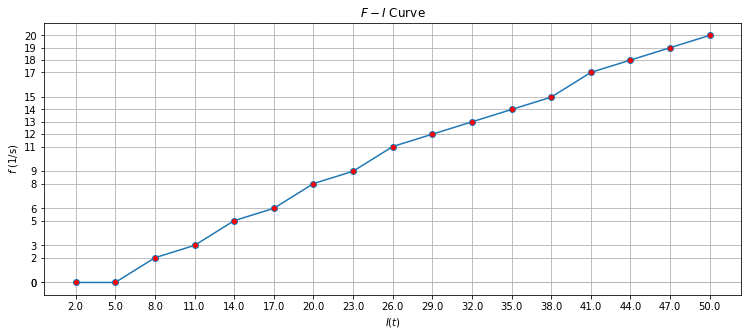

In [64]:
fi_curve(currents, frequencies)

Noise is not very effective in this case as well.

Now for the final simulation, we test the effect of changing $\tau_w$. By increasing it
the decaying of $w$ (and also growing by the effect of term $a$) will be slower.
However, it makes the effect of term $b$ more significant. So changing it
should not change the output very much.

## Simulation with neuron_params_4
$\tau_w = 500$,
$a = 0.1$,
$b = 0.1$,

In [65]:
neuron_params_4 = {'threshold': -50, 'u_rest': -65, 'tau': 50,
                   'delta_T': 5, 'theta_rh': -55, 'theta_reset': -20,
                   'tau_w': 500, 'a': 0.1, 'b': 0.1}

currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_4,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=20,
        neuron_type=neuron_type,
        noise_std=0,
        line_slop=0
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 9.422s
Currents: [ 2.  8. 14. 20. 26. 32. 38. 44. 50.]
frequencies: [ 0  3  8 12 15 19 22 25 28]


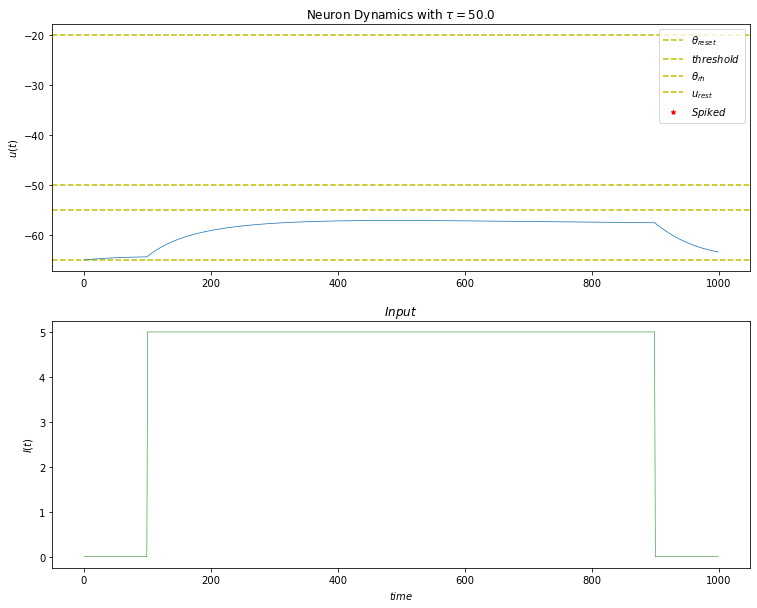

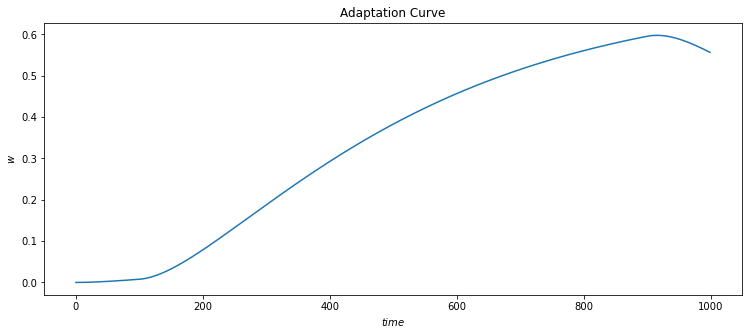

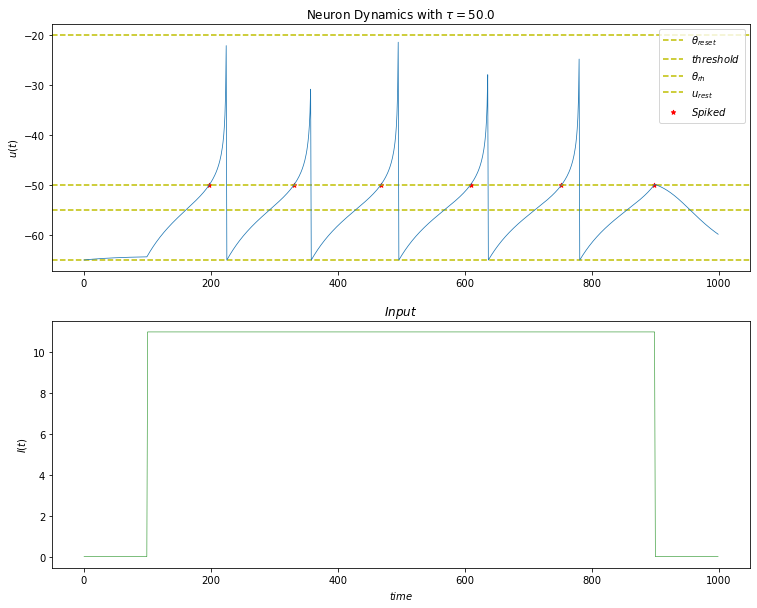

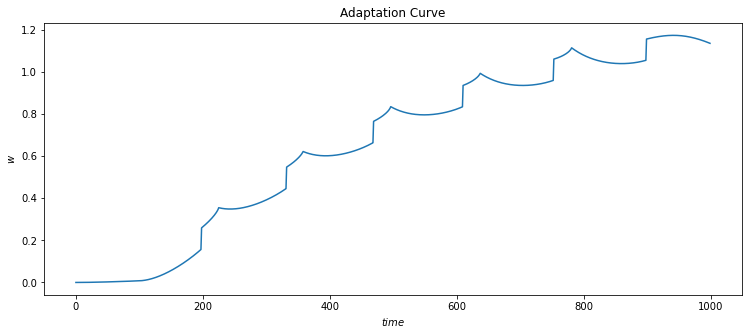

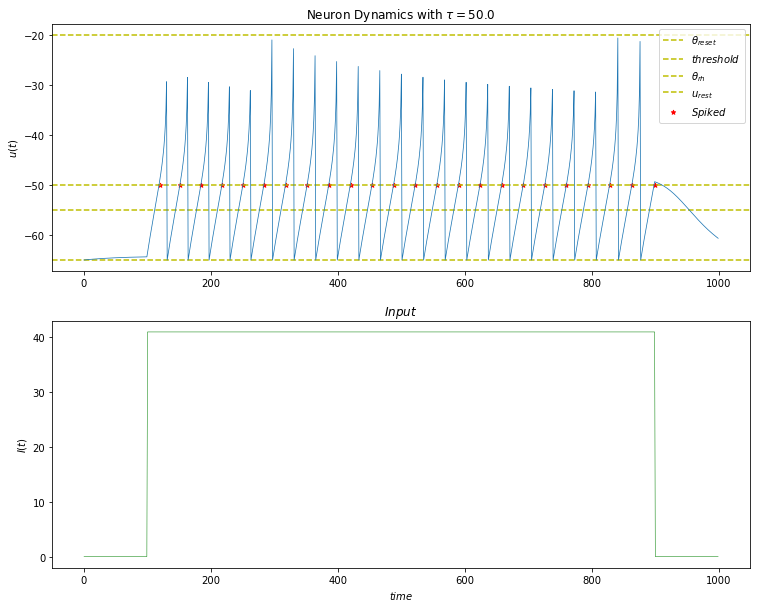

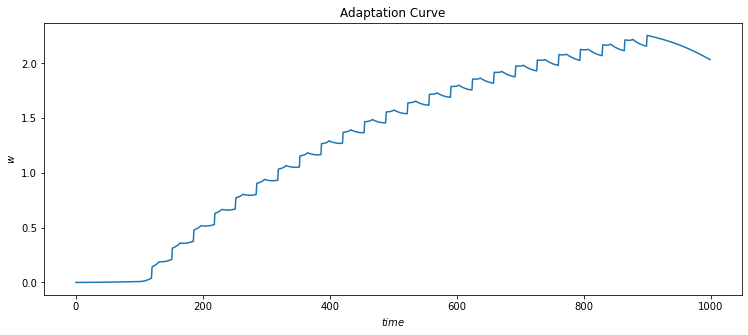

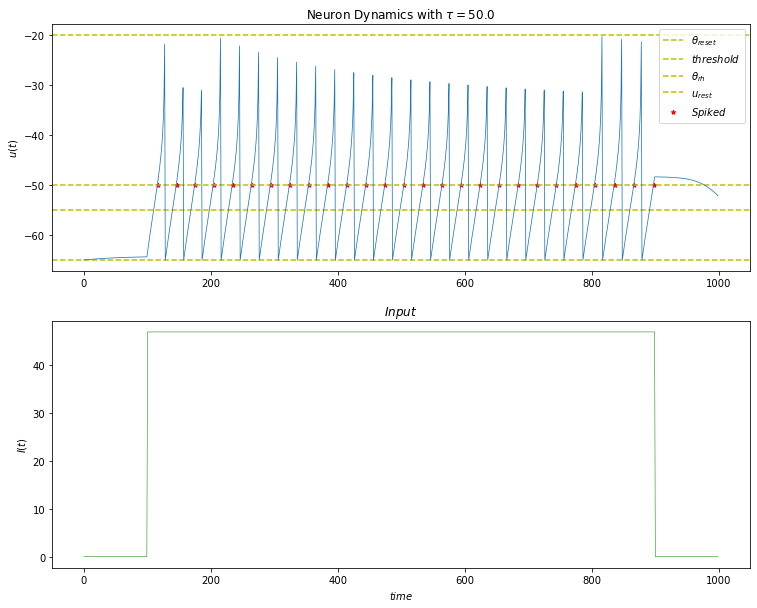

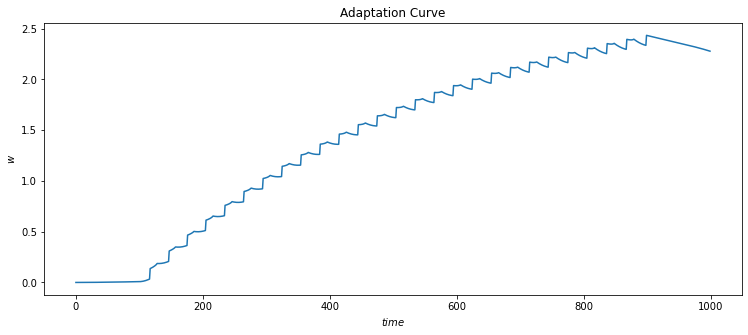

In [66]:
if save_monitor_states:
    # for i in range(0, len(step_currents), num_steps // 4):
    for i in [1, 3, -4, -2]:
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
        adaptation_plot(monitor_states[i])
else:
    time_plot(monitor, plot_spikes=False, figsize=(12.5, 10))

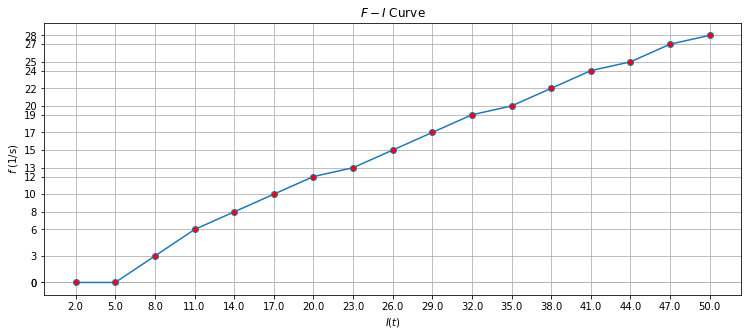

In [67]:
fi_curve(currents, frequencies)

## Simulation with neuron_params_5
$\tau_w = 50$,
$a = 0.1$,
$b = 0.1$,

In [68]:
neuron_params_5 = {'threshold': -50, 'u_rest': -65, 'tau': 50,
                   'delta_T': 5, 'theta_rh': -55, 'theta_reset': -20,
                   'tau_w': 50, 'a': 0.1, 'b': 0.1}

currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_5,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=20,
        neuron_type=neuron_type,
        noise_std=0,
        line_slop=0
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 9.573s
Currents: [ 2.  8. 14. 20. 26. 32. 38. 44. 50.]
frequencies: [ 0  3  8 11 15 19 22 25 29]


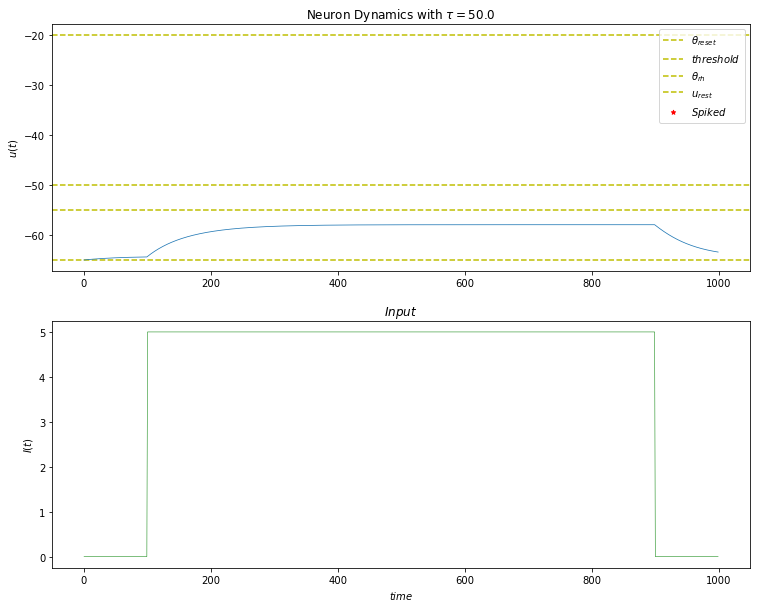

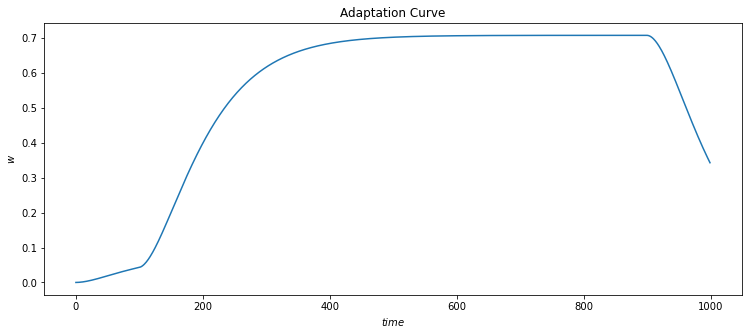

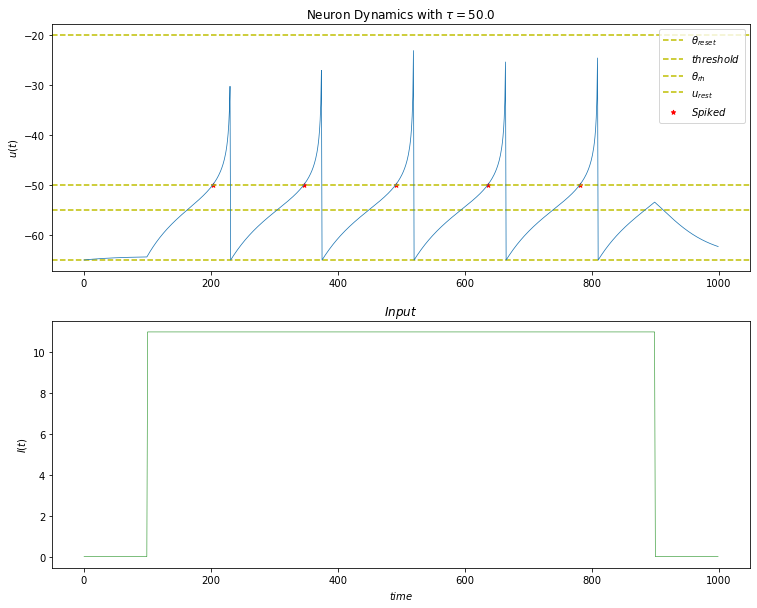

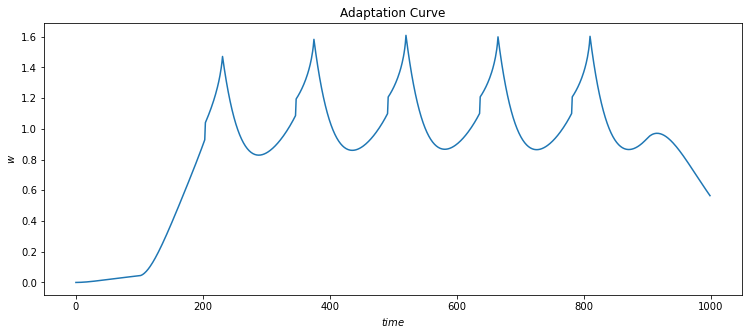

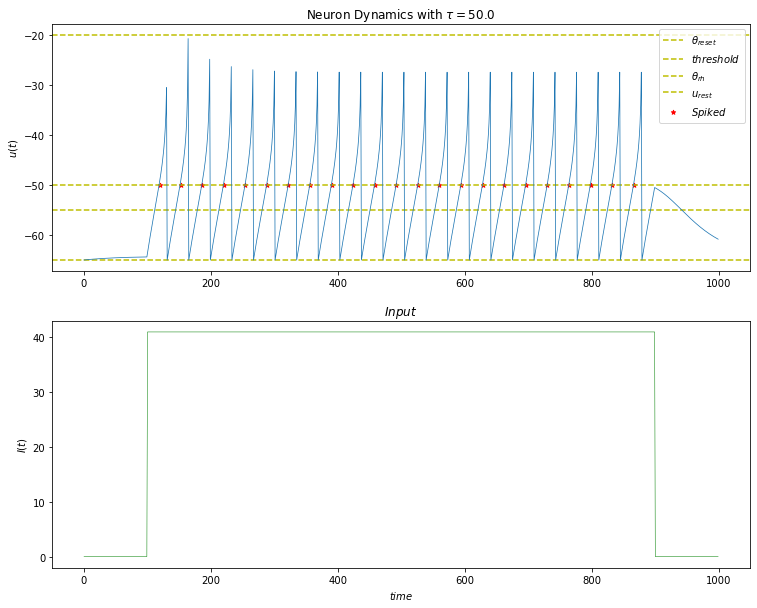

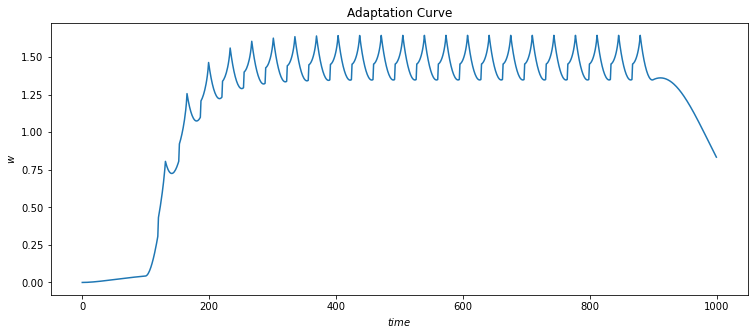

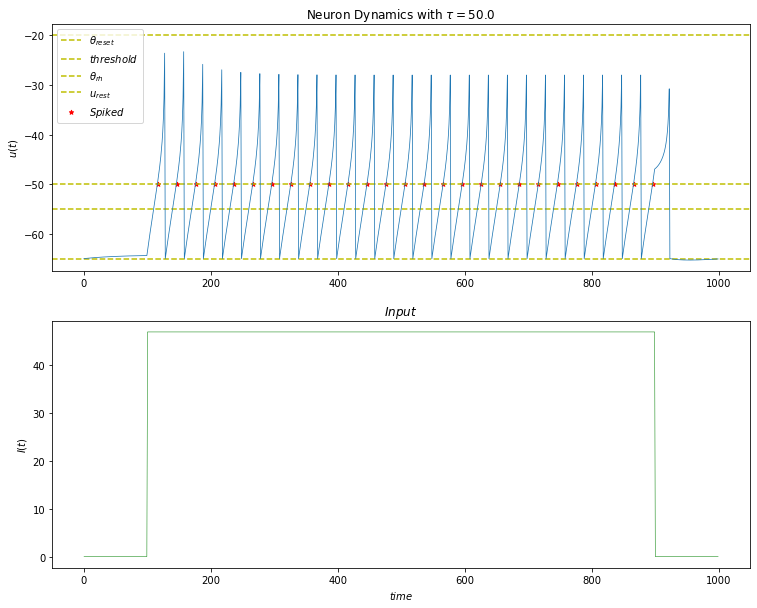

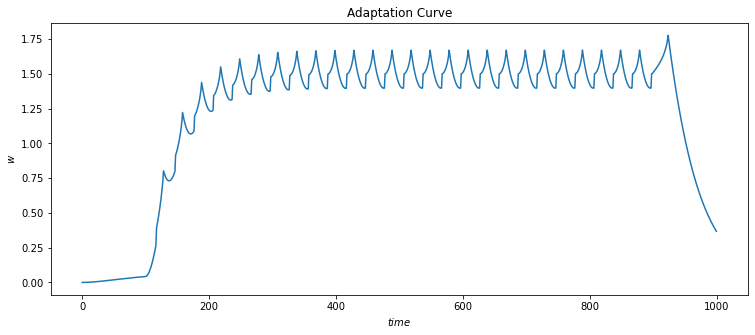

In [69]:
if save_monitor_states:
    # for i in range(0, len(step_currents), num_steps // 4):
    for i in [1, 3, -4, -2]:
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
        adaptation_plot(monitor_states[i])
else:
    time_plot(monitor, plot_spikes=False, figsize=(12.5, 10))

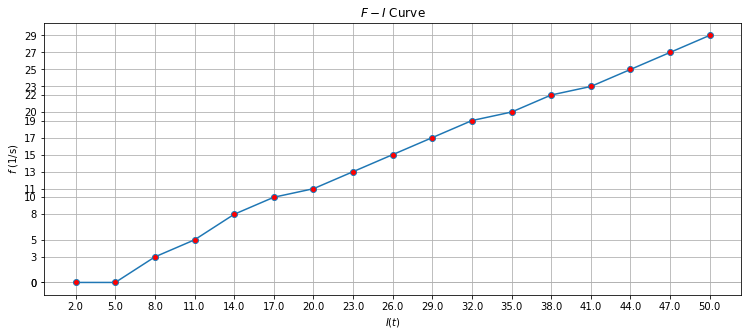

In [70]:
fi_curve(currents, frequencies)

As we can see from the two previous simulations, changing the value of $\tau_w$
does not affect the F-I curve significantly.

### With noise: $\sigma_{noise} = 5$

In [71]:
currents, frequencies, monitor, monitor_states, sim_time  = \
    run_simulation_with_params(
        neuron_params=neuron_params_5,
        monitor_vars=monitor_vars,
        currents=step_currents,
        iters=iters,
        save_monitor_states=save_monitor_states,
        zero_percent=20,
        neuron_type=neuron_type,
        noise_std=5,
        line_slop=0
    )
print('Simulation time: {:.3f}s'.format(sim_time))
print('Currents:', currents[::2])
print('frequencies:', frequencies[::2])

Simulation time: 9.583s
Currents: [ 2.  8. 14. 20. 26. 32. 38. 44. 50.]
frequencies: [ 0  3  7 11 15 19 22 25 28]


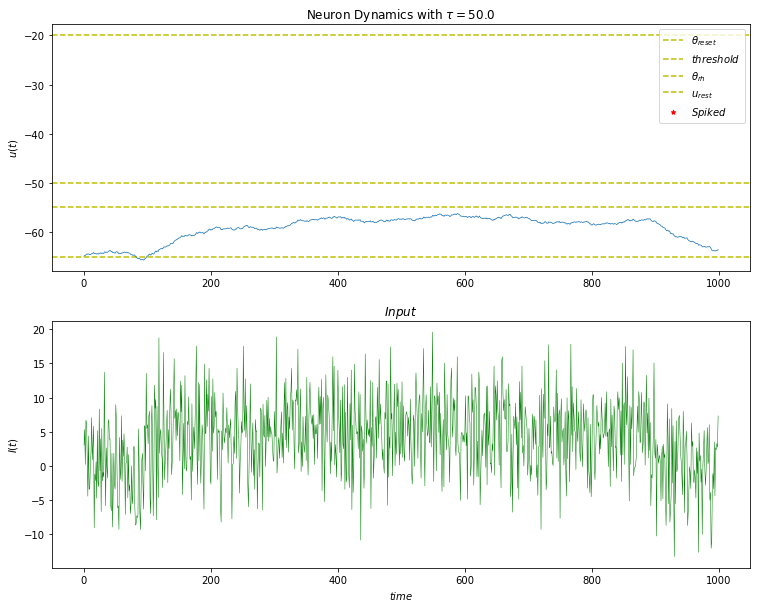

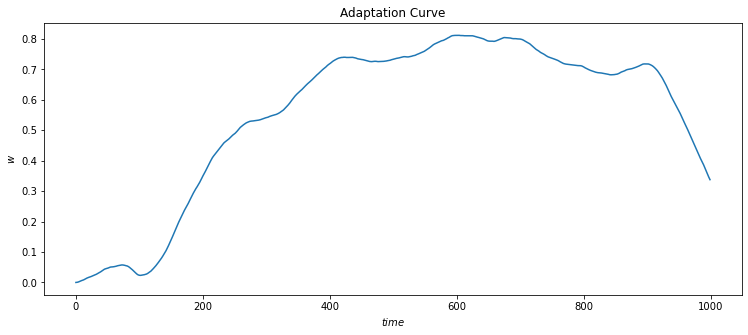

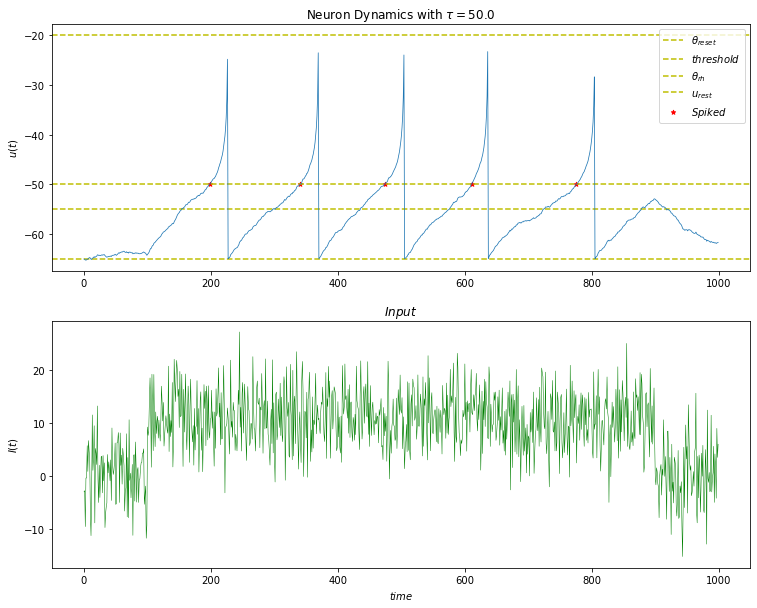

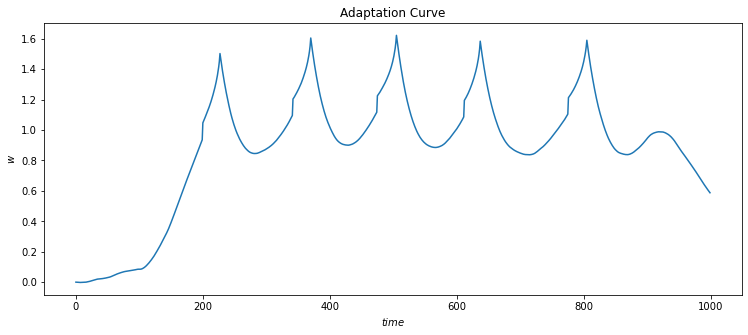

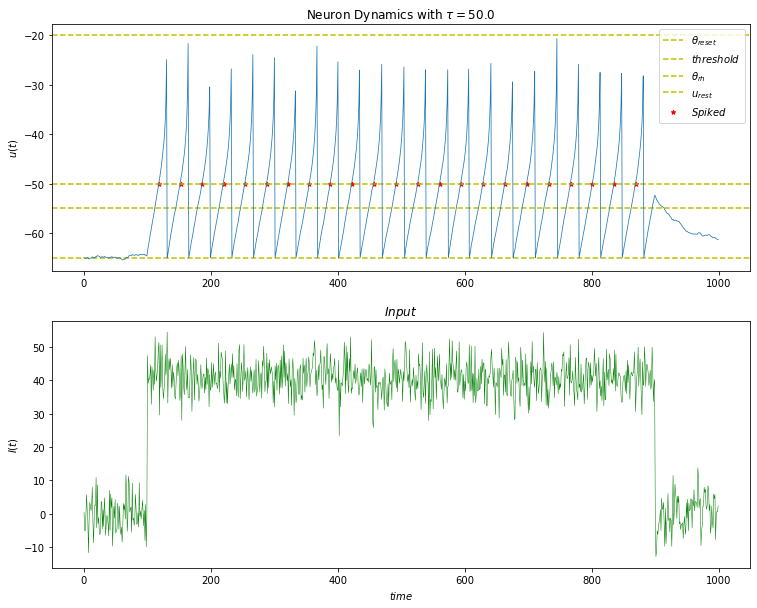

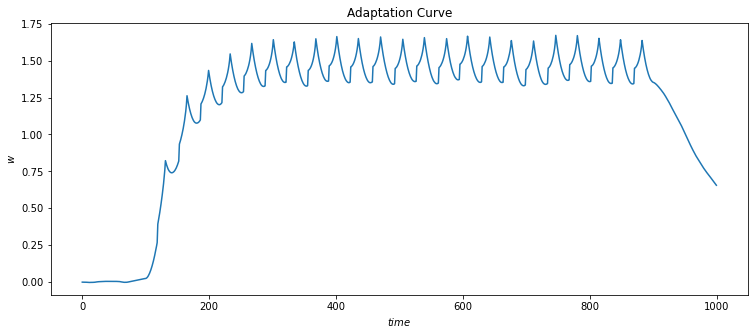

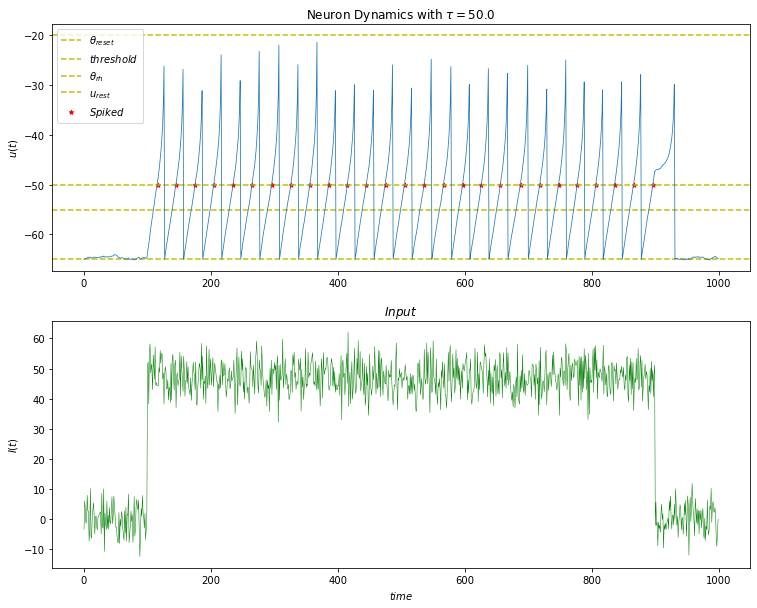

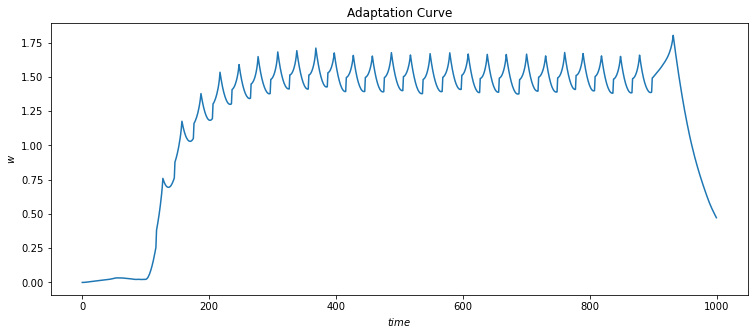

In [72]:
if save_monitor_states:
    # for i in range(0, len(step_currents), num_steps // 4):
    for i in [1, 3, -4, -2]:
        time_plot(monitor_states[i], plot_spikes=False, figsize=(12.5, 10))
        adaptation_plot(monitor_states[i])
else:
    time_plot(monitor, plot_spikes=False, figsize=(12.5, 10))

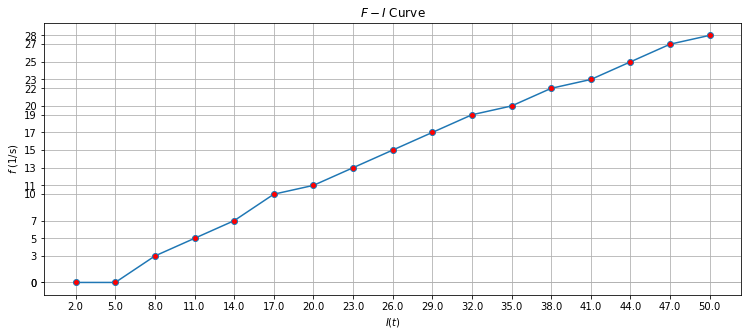

In [73]:
fi_curve(currents, frequencies)

Noise is not effective here as well.

# Summary

1. Adding noise to the input is not very effective in most of the cases.
2. The higher the input current, the higher the firing frequency.
3. If the difference of u_rest and threshold increases, the firing rate
decreases.
4. By increasing the value of $\tau$, the firing rate decreases as it makes
the potential updates slower.
5. In ELIF neuron, $\Delta_T$'s value is not very effective on the neuron's
activity pattern in high value inputs. Because regardless of this parameter,
the neuron's potential will grow exponentially after reaching the $\theta_{rh}$.
Only in low value inputs its effect is significant.
6. $\theta_{reset}$ is not important.
7. The lower the value of $\theta_{rh}$, the higher the spike frequency.
8. In AELIF neuron, increasing the value of $a$, cause the neuron to be less
active, as it increases the adaptation factor.
9. The value of $\tau_w$ is not very effective in general. Because it shows up
in two parts of the update rule, and it will be canceled out with the effect of
the last term of the update rule. However, increasing it make the decaying slower,
as it gets multiplied in the other two parts of the update_term.
10. By increasing $b$, every time a spike happens, the value of $w$ will be
increased more than before, so the neuron will reach the threshold later than before.
11. An ELIF neuron and a LIF neuron, will have almost the same F-I curve if
their shared parameters are equal. The LIF neuron's activity will be a little
higher due to the fact that its potential gets rested instantly, while ELIF
neuron's resetting will take place a bit after the neuron's spike.